In [1]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
correlation_df_all = pd.read_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_dropna.pkl")

In [3]:
tf_list_dep_bylineage = pd.read_pickle("pydata/tf_list_by_lineage.pkl")

In [4]:
tf_list_dep_bylineage

,OncotreeLineage,TF,dependency,effect,n_models
2974,Biliary Tract,ADNP,0.262168,-0.261788,36
2975,Biliary Tract,ADNP2,0.051071,-0.039606,36
2976,Biliary Tract,AEBP1,0.066771,-0.084119,36
2978,Biliary Tract,AHDC1,0.108234,-0.125744,36
2981,Biliary Tract,AKAP8,0.060307,-0.079361,36
...,...,...,...,...,...
43105,Uterus,ZSCAN20,0.125542,-0.176342,35
43106,Uterus,ZSCAN21,0.050121,-0.066914,35
43109,Uterus,ZSCAN25,0.056327,-0.077598,35
43111,Uterus,ZSCAN30,0.065050,-0.078255,35


In [5]:
correlation_df_all

,lineage,TF,E3_ligase,p-val,corr
0,Ampulla of Vater,TFAP2A,KDM2A,0.709839,-0.157329
1,Ampulla of Vater,TFAP2B,KDM2A,0.588720,0.227030
2,Ampulla of Vater,TFAP2C,KDM2A,0.195091,-0.511497
3,Ampulla of Vater,TFAP2D,KDM2A,0.350621,0.381823
4,Ampulla of Vater,TFAP2E,KDM2A,0.270403,-0.444031
...,...,...,...,...,...
749695,Vulva/Vagina,BMAL2,NEURL1,1.000000,-1.000000
749696,Vulva/Vagina,ZNF875,NEURL1,1.000000,-1.000000
749697,Vulva/Vagina,CBLL2,NEURL1,1.000000,1.000000
749698,Vulva/Vagina,ZUP1,NEURL1,1.000000,1.000000


In [6]:
correlation_df_all_p = correlation_df_all[correlation_df_all['p-val'] < 0.05]
correlation_df_all_p_c = correlation_df_all_p[correlation_df_all_p['corr'] < 0]

In [7]:
correlation_df_all_p_c = correlation_df_all_p_c.rename(columns= {"lineage" : "OncotreeLineage"})

In [8]:
correlation_df_all_p_c

,OncotreeLineage,TF,E3_ligase,p-val,corr
103,Ampulla of Vater,NPAS4,KDM2A,0.003001,-0.890722
166,Ampulla of Vater,FOSL1,KDM2A,0.023015,-0.777950
171,Ampulla of Vater,JUNB,KDM2A,0.024809,-0.771955
213,Ampulla of Vater,FIZ1,KDM2A,0.025354,-0.770188
289,Ampulla of Vater,PRMT3,KDM2A,0.009950,-0.834630
...,...,...,...,...,...
749528,Uterus,PPARG,NEURL1,0.029180,-0.368946
749535,Uterus,RXRA,NEURL1,0.026382,-0.375137
749558,Uterus,DACH2,NEURL1,0.030194,-0.366822
749614,Uterus,PROX1,NEURL1,0.010259,-0.428316


In [9]:
correlation_df_all_p_c_f= correlation_df_all_p_c[correlation_df_all_p_c['OncotreeLineage'].isin(tf_list_dep_bylineage['OncotreeLineage'])]
correlation_df_all_p_c_filtered = correlation_df_all_p_c_f[correlation_df_all_p_c_f['TF'].isin(tf_list_dep_bylineage['TF'])]

In [120]:
correlation_df_all_p_c_filtered.to_pickle("correlation_filtered_by_TF_dep_by_lineage.pkl")

In [14]:
tf_e3_corrs_fdrs = pd.read_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_fdr.pkl")

In [15]:
tf_e3_corrs_fdrs_filtered = tf_e3_corrs_fdrs[tf_e3_corrs_fdrs['fdr']< 0.1]

In [16]:
tf_e3_corrs_fdrs_filtered

,lineage,TF,E3_ligase,p-val,corr,fdr,log10q
61546,Biliary Tract,ZBTB4,BIRC7,4.519791e-07,-0.729343,0.078253,1.106501
133510,Biliary Tract,ZKSCAN7,MARCHF10,1.903086e-07,0.744758,0.049423,1.306070
397622,Biliary Tract,NR5A1,TRIM50,2.524961e-08,-0.776952,0.013115,1.882243
7560,Bladder/Urinary Tract,PAX8,RNF212,5.528394e-07,-0.740536,0.047857,1.320050
61964,Bladder/Urinary Tract,ZNF706,BIRC7,2.609746e-08,-0.790857,0.006778,2.168930
...,...,...,...,...,...,...,...
686320,Uterus,PATZ1,SOCS7,5.560403e-06,0.685342,0.076002,1.119175
692768,Uterus,OTX2,SPSB4,9.336810e-08,-0.763922,0.006062,2.217390
734748,Uterus,ZBTB41,TRIM58,8.355319e-06,-0.675906,0.095436,1.020286
735020,Uterus,ZNF501,TRIM58,2.142585e-06,-0.706159,0.039745,1.400718


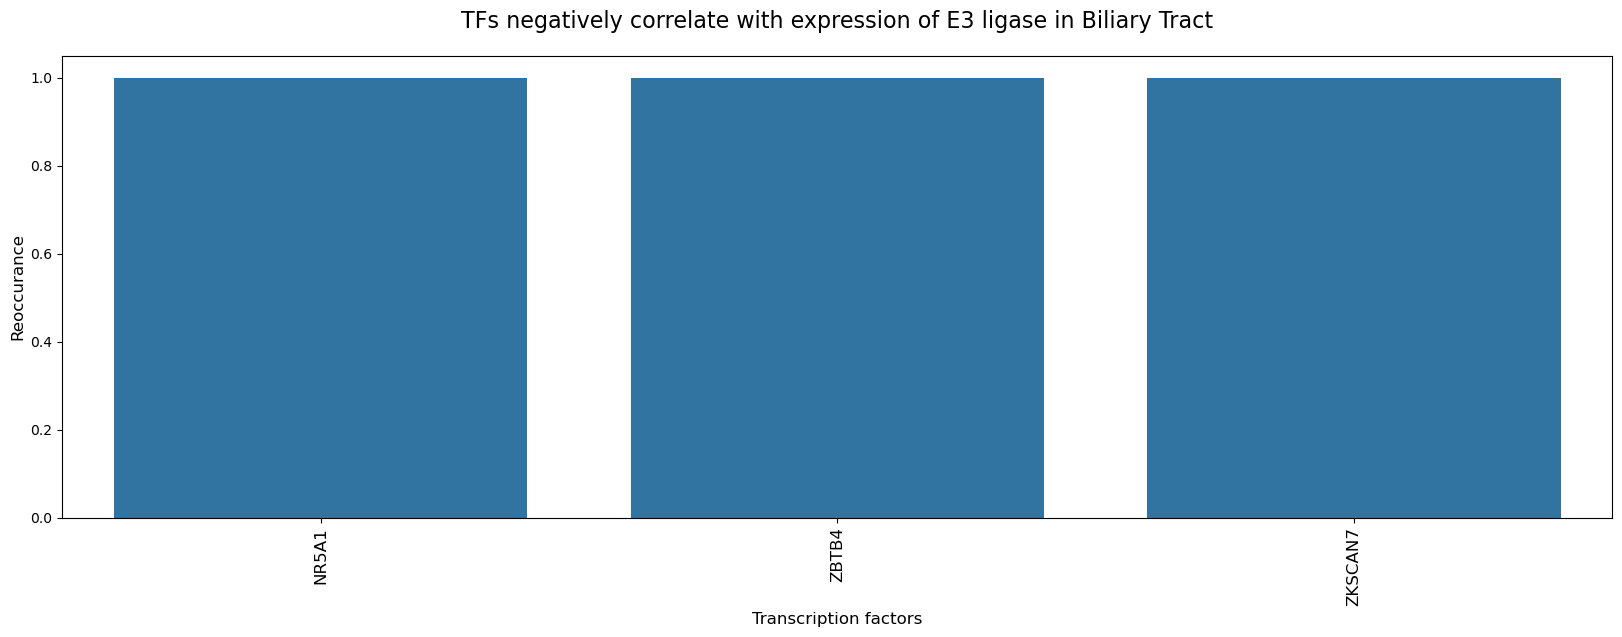

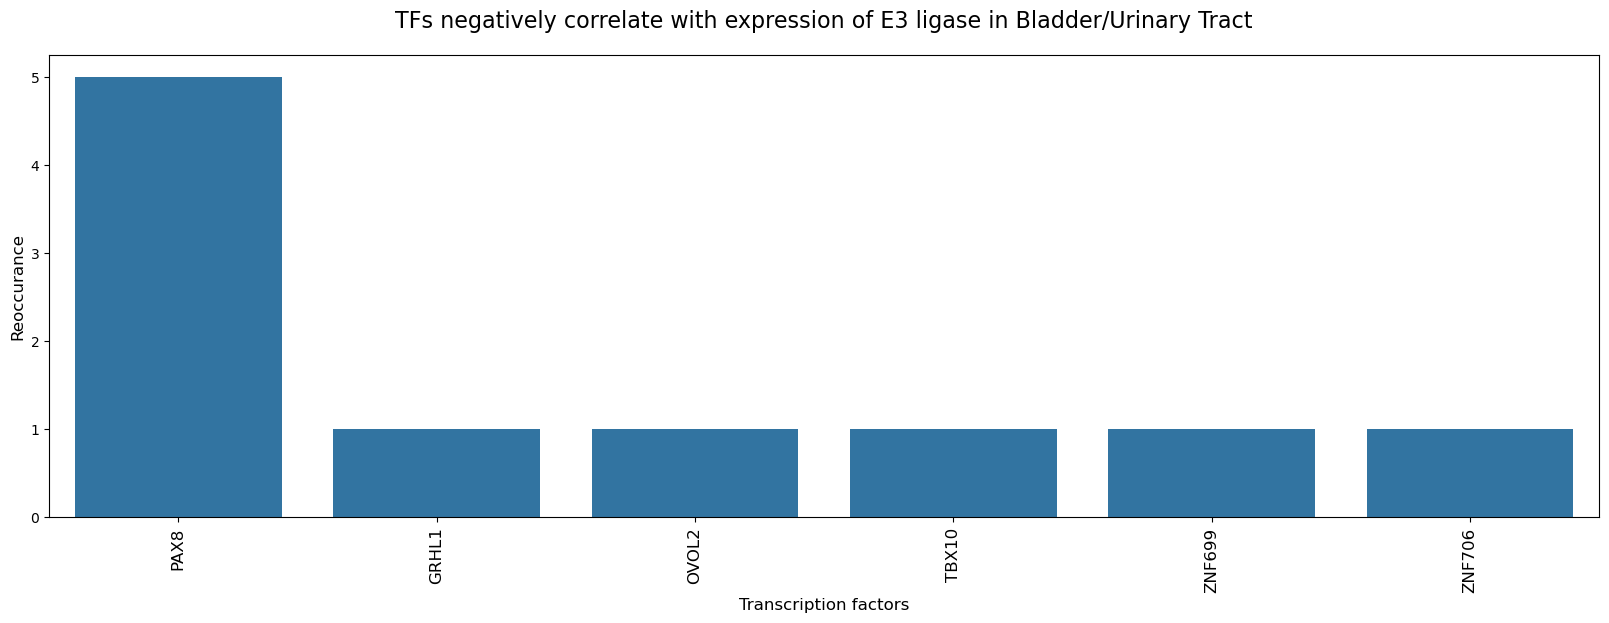

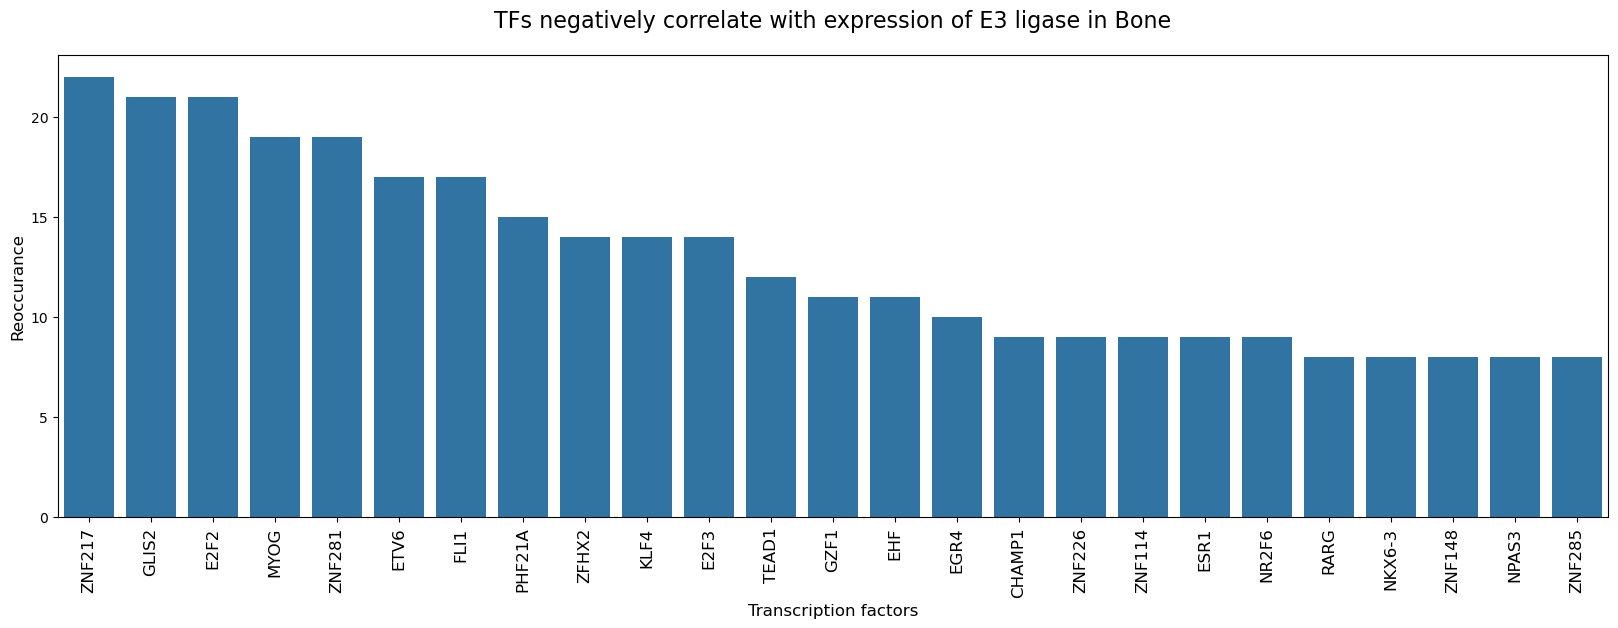

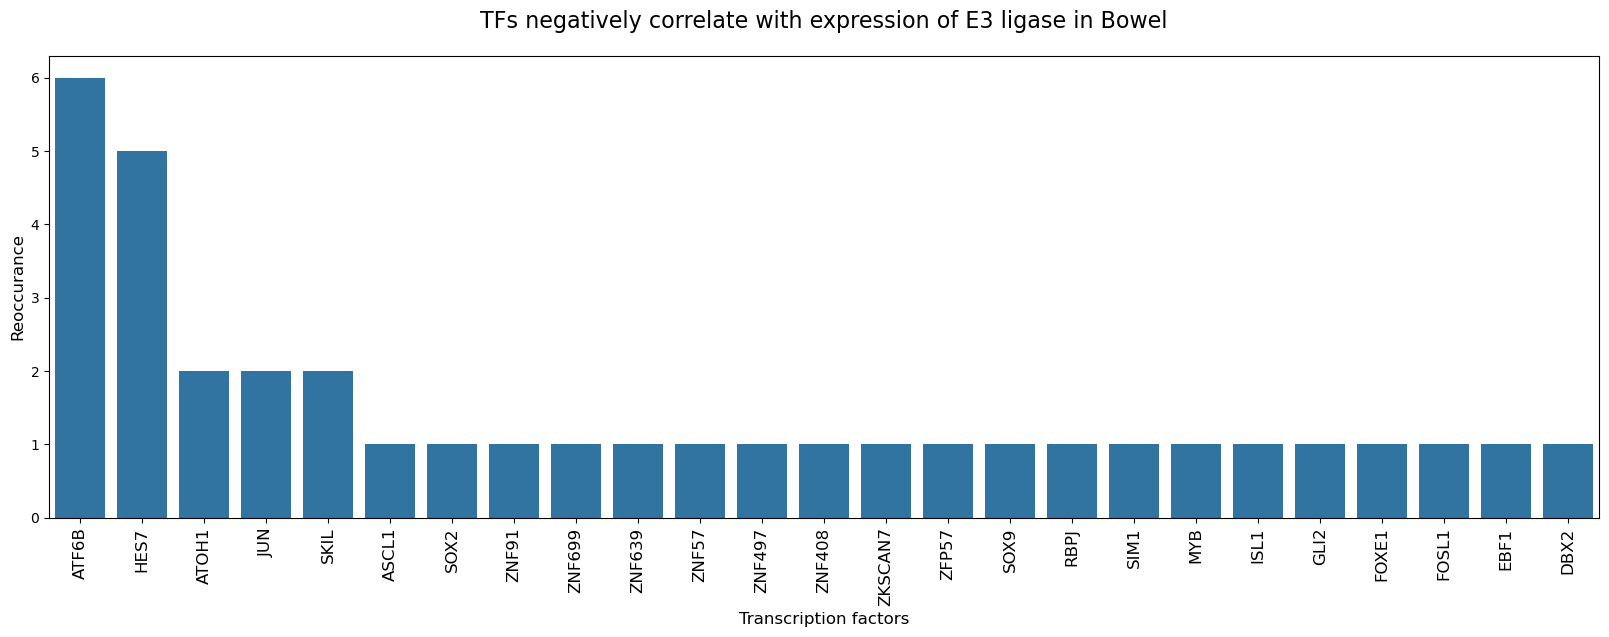

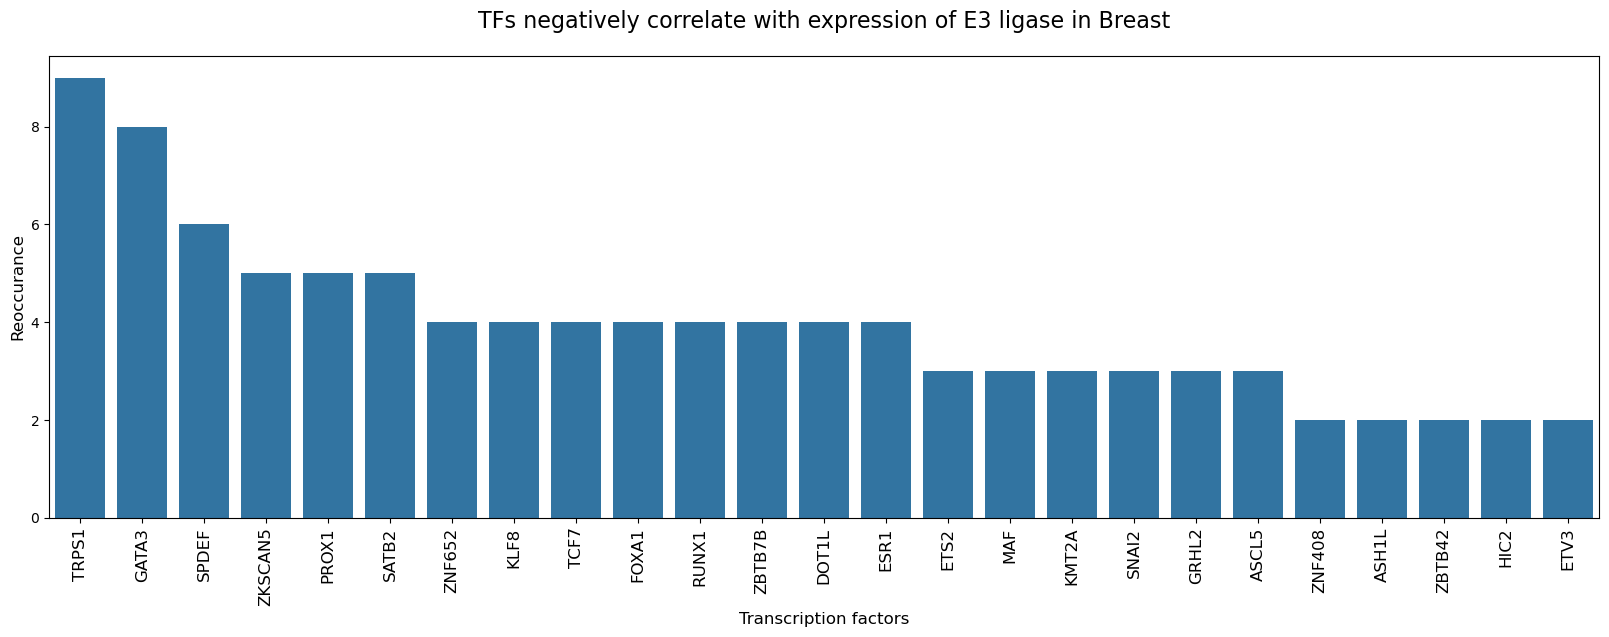

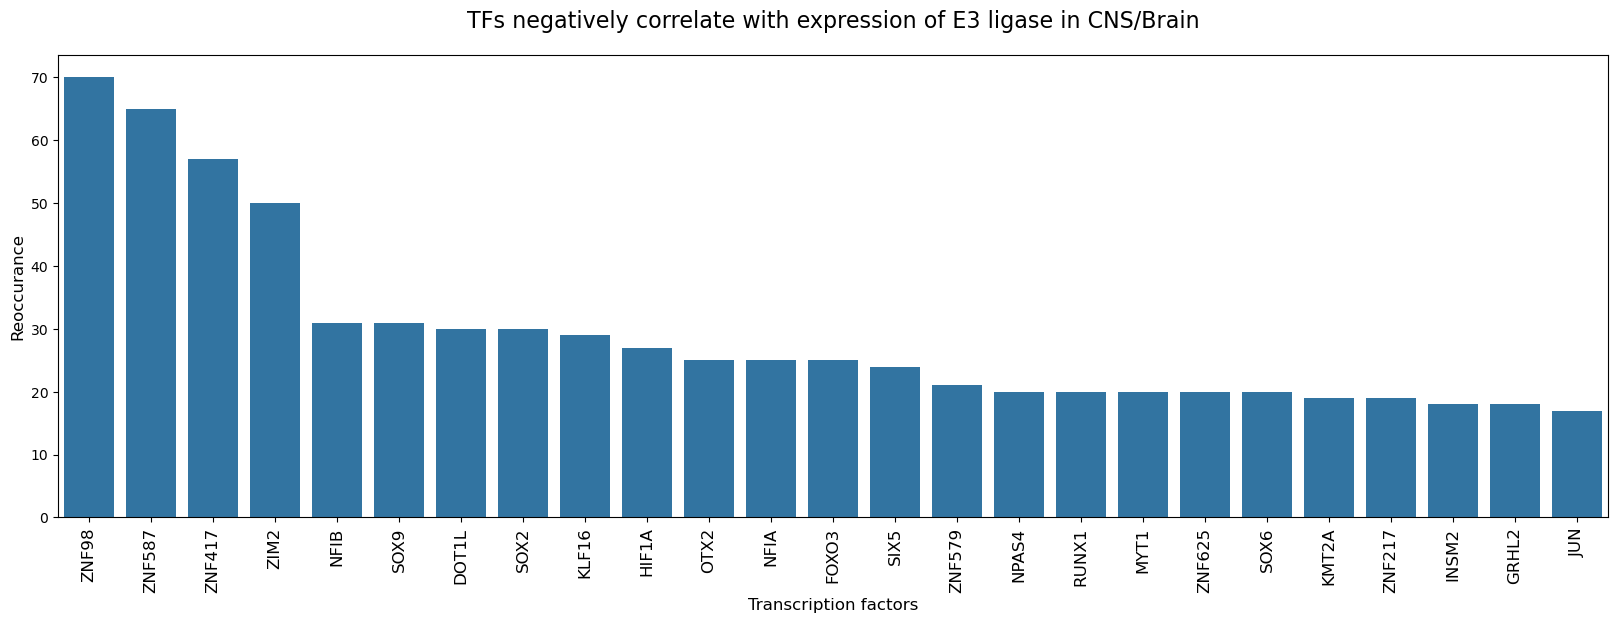

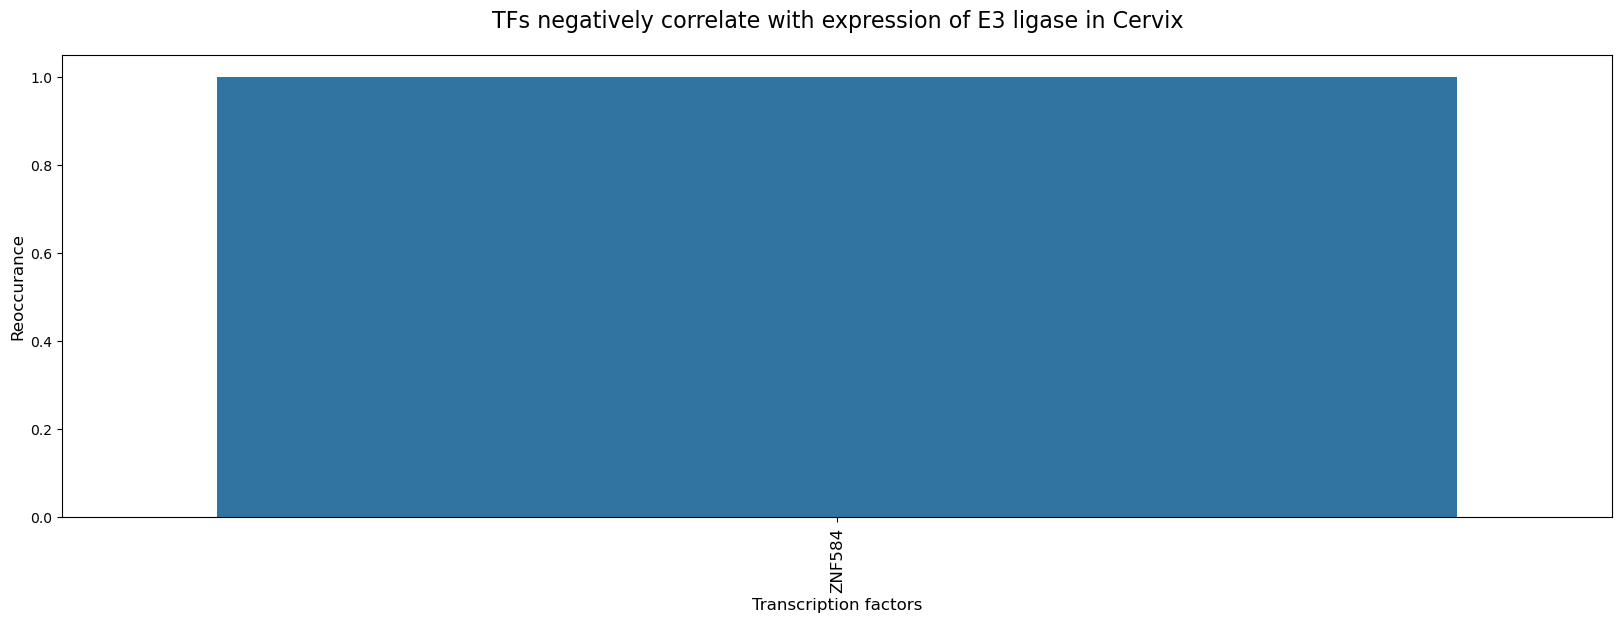

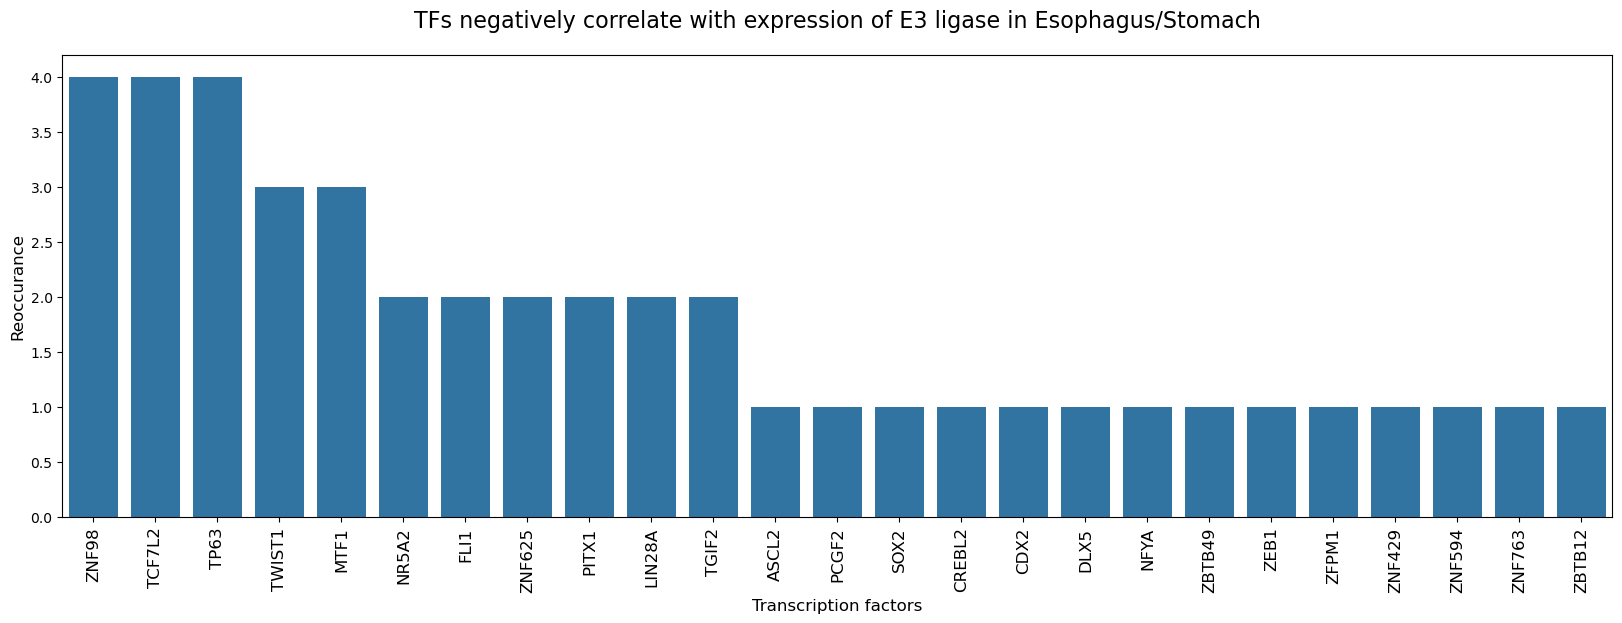

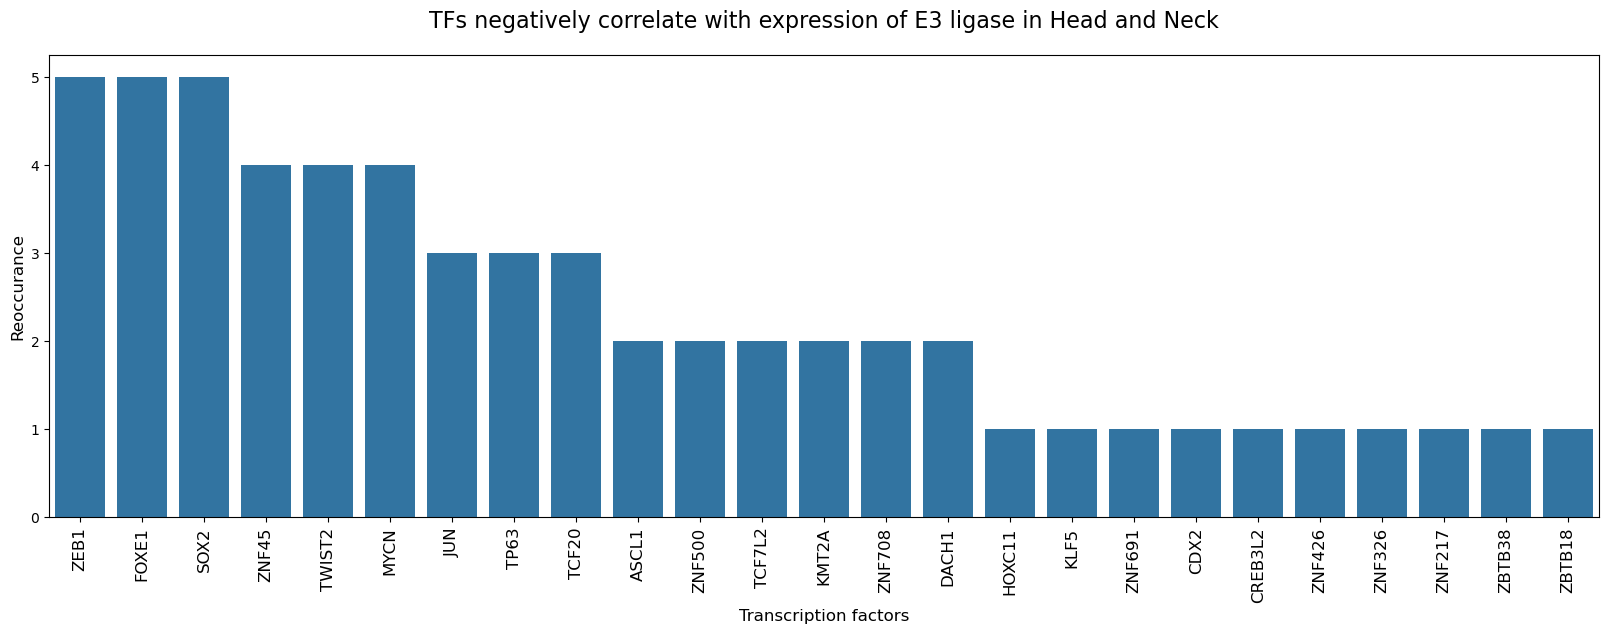

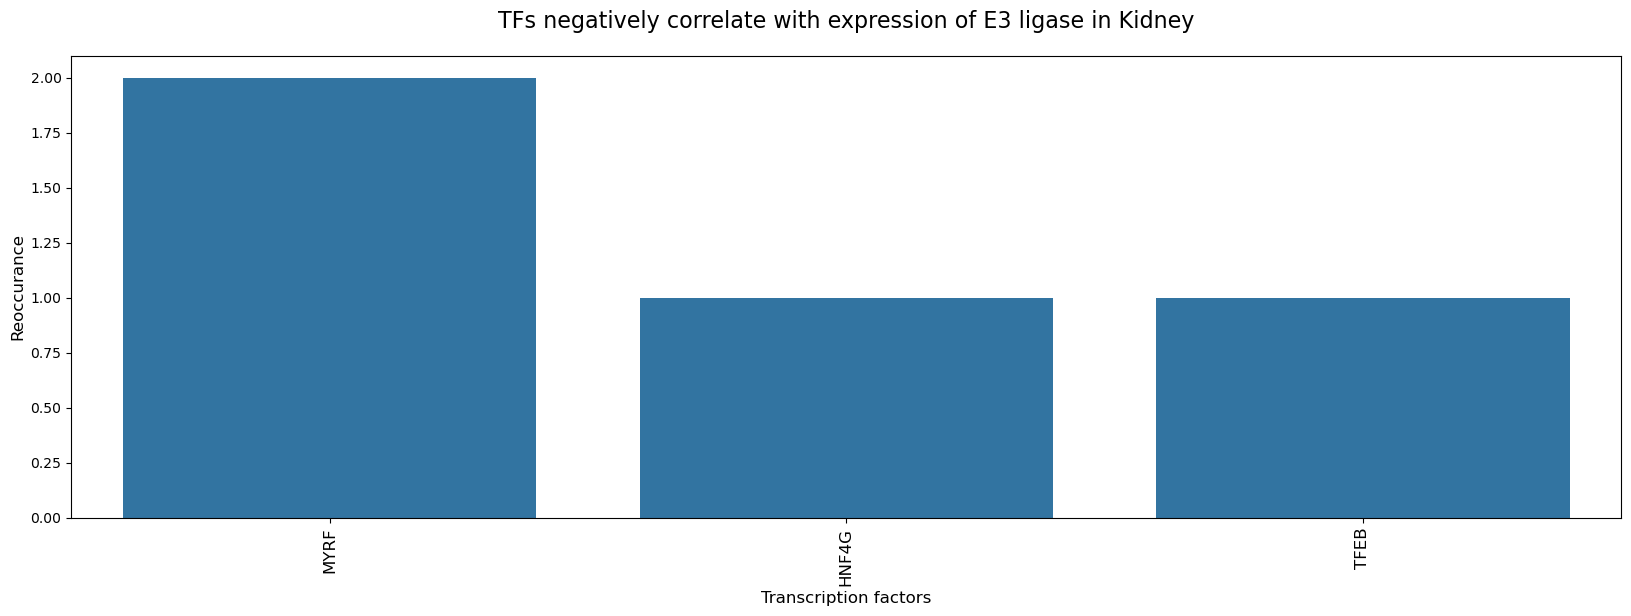

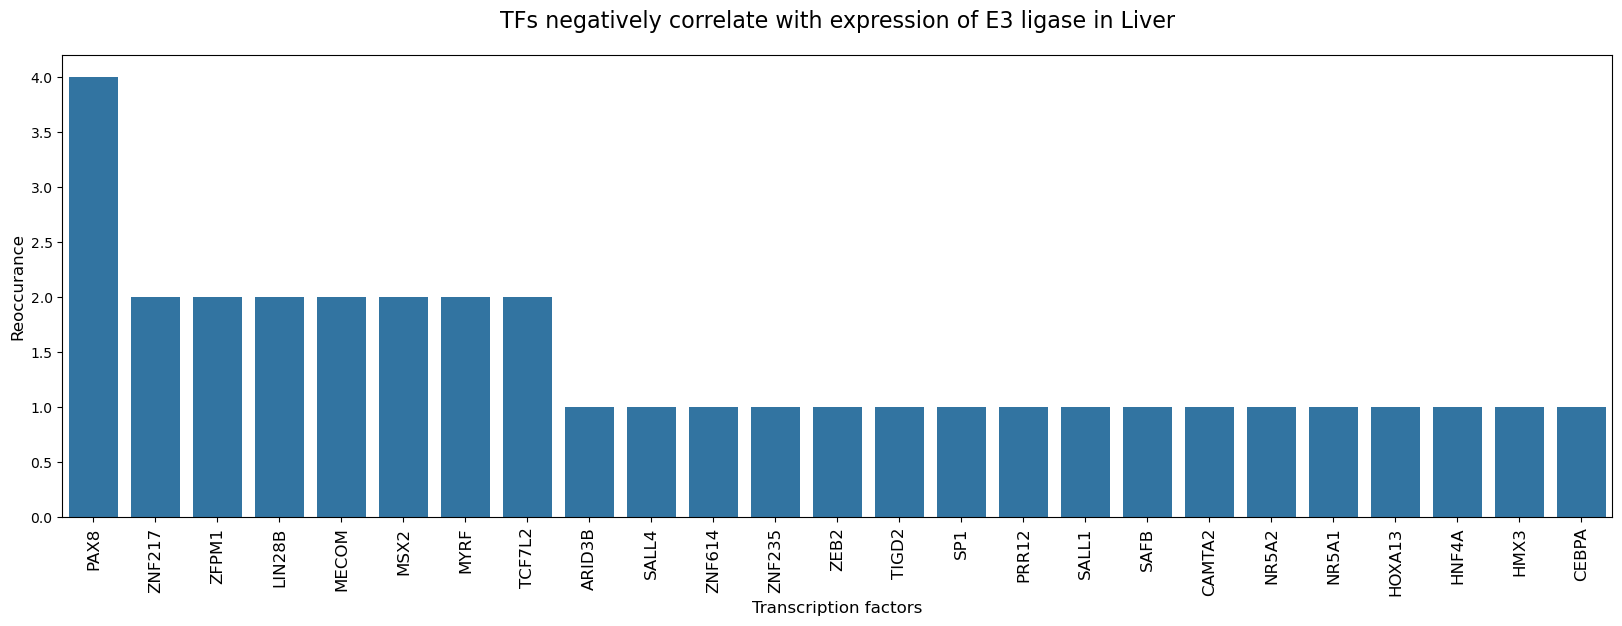

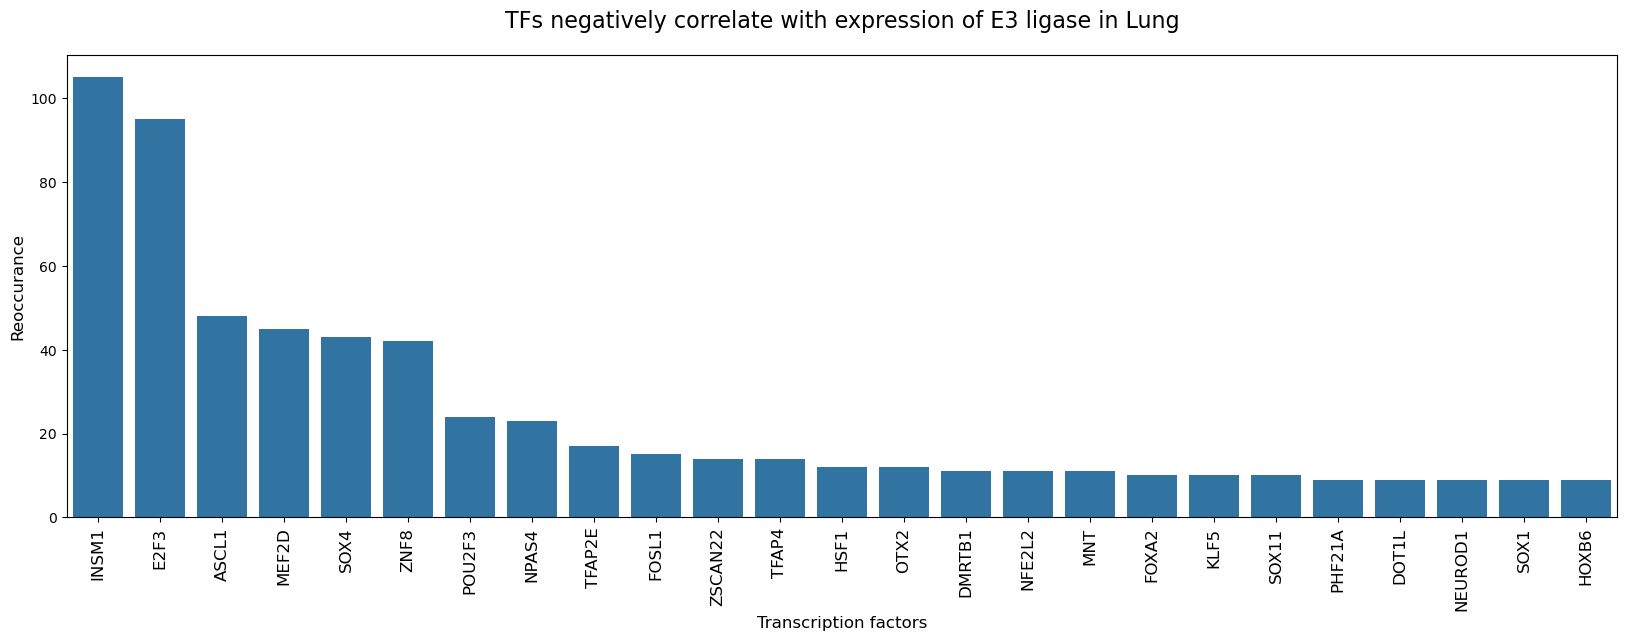

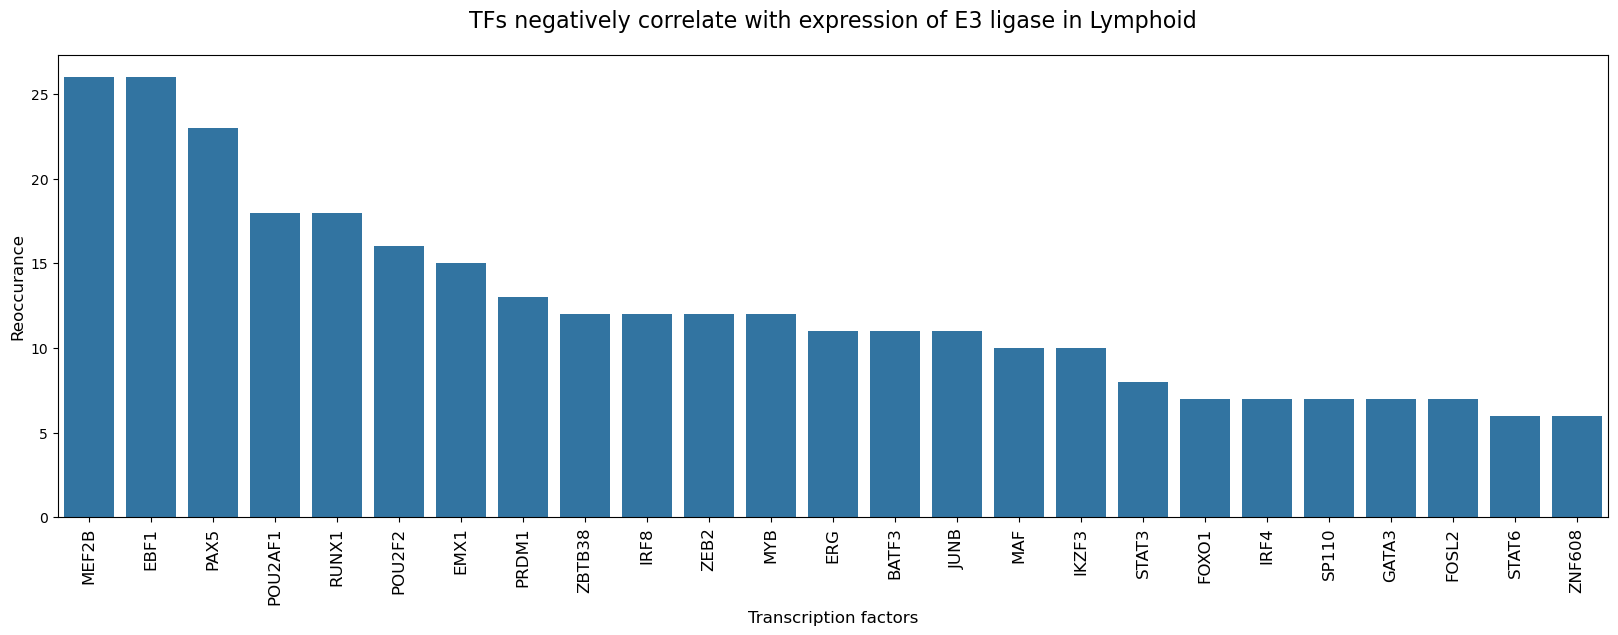

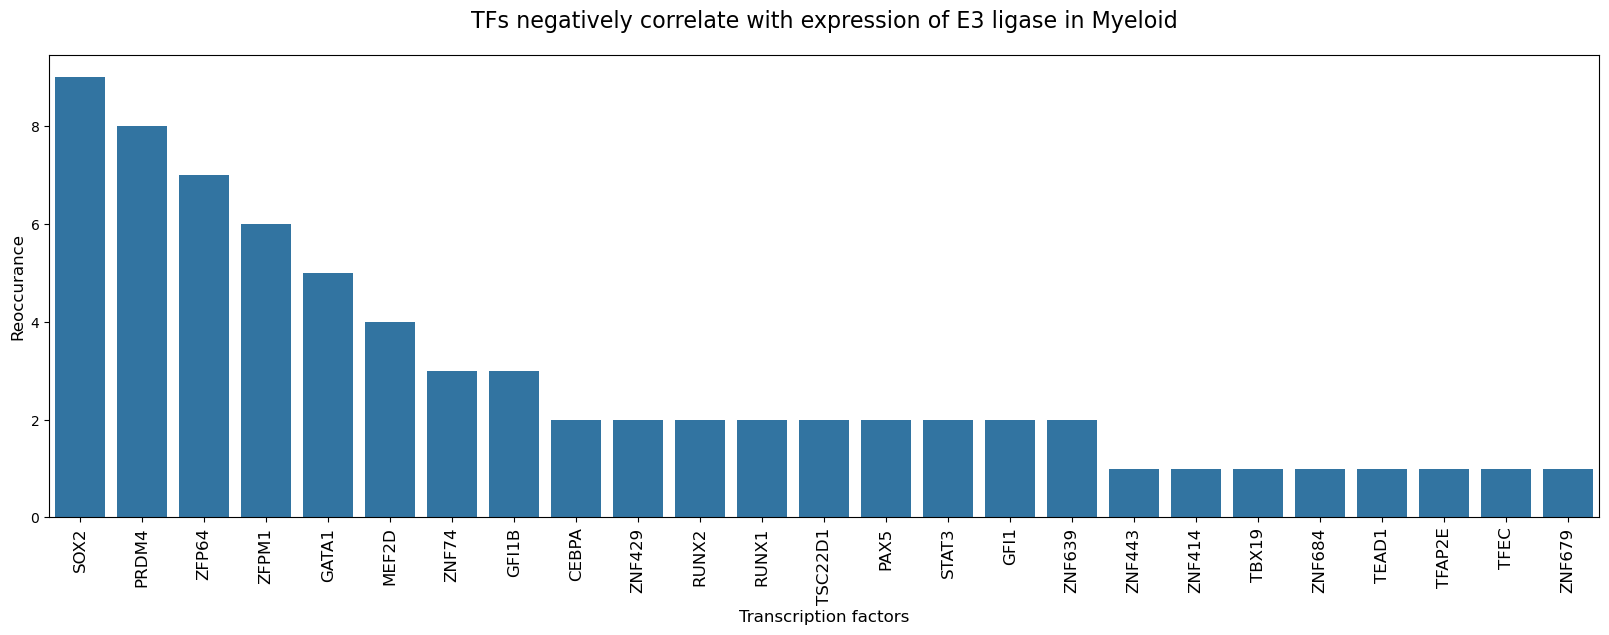

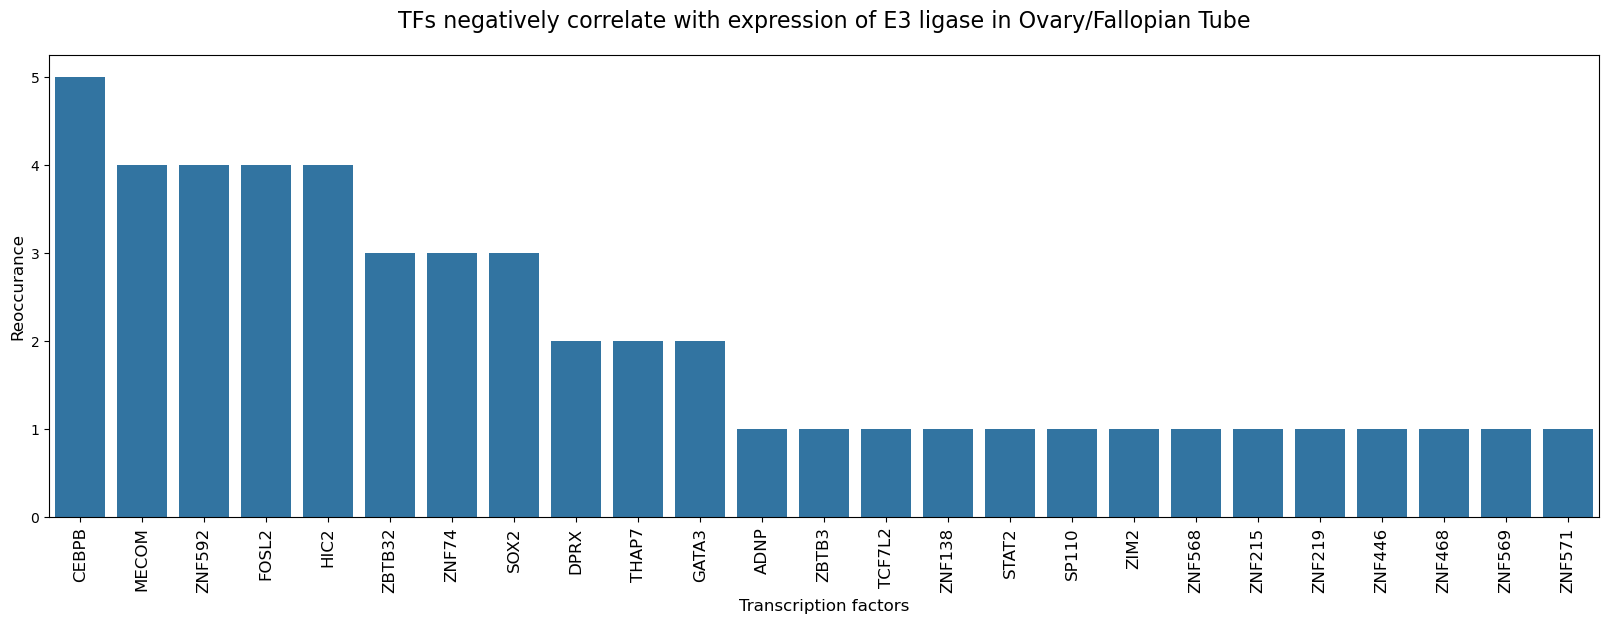

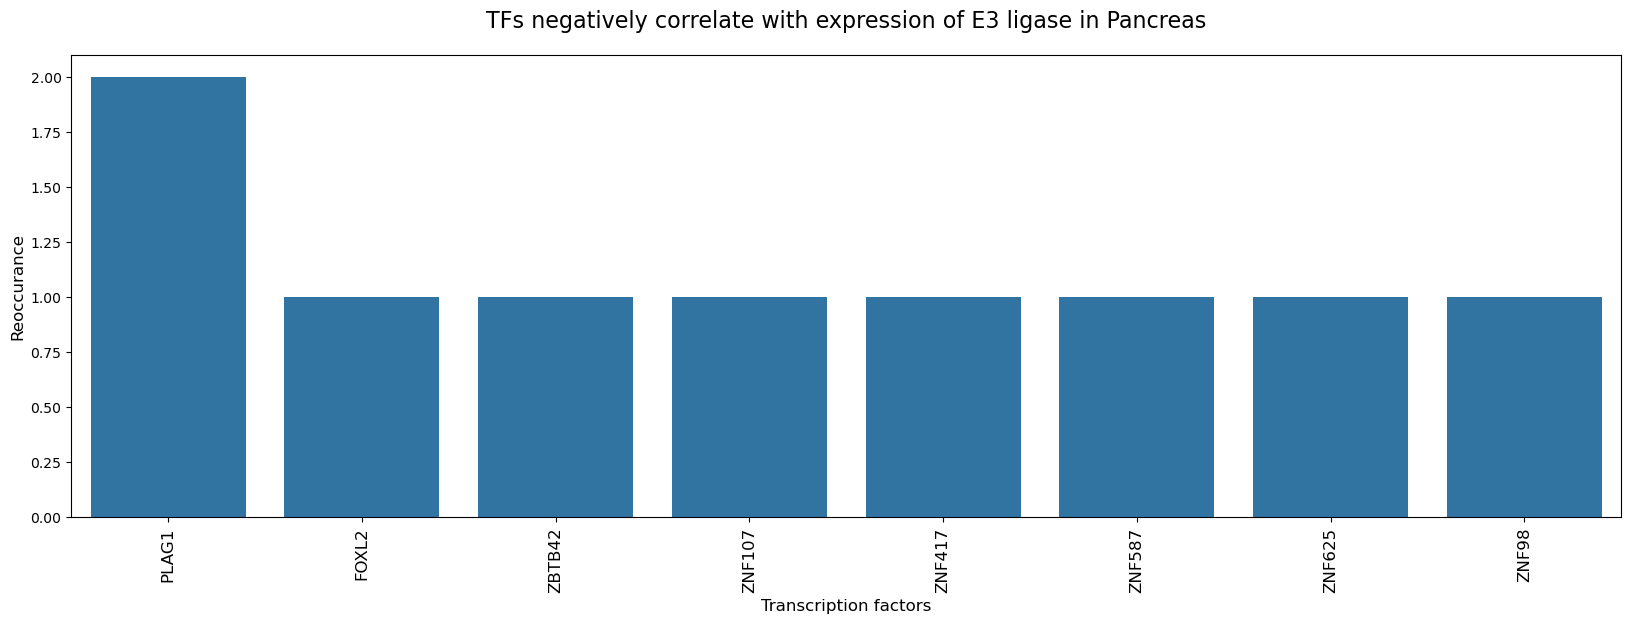

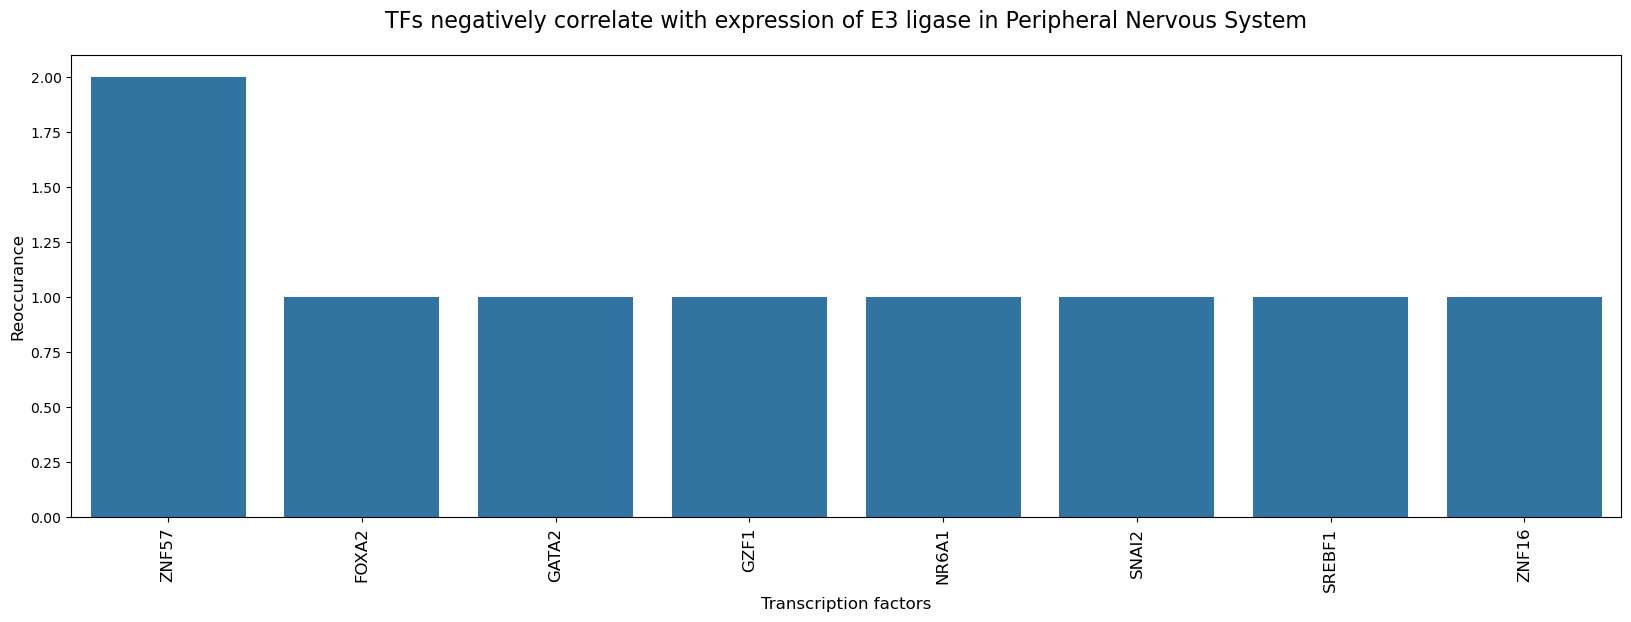

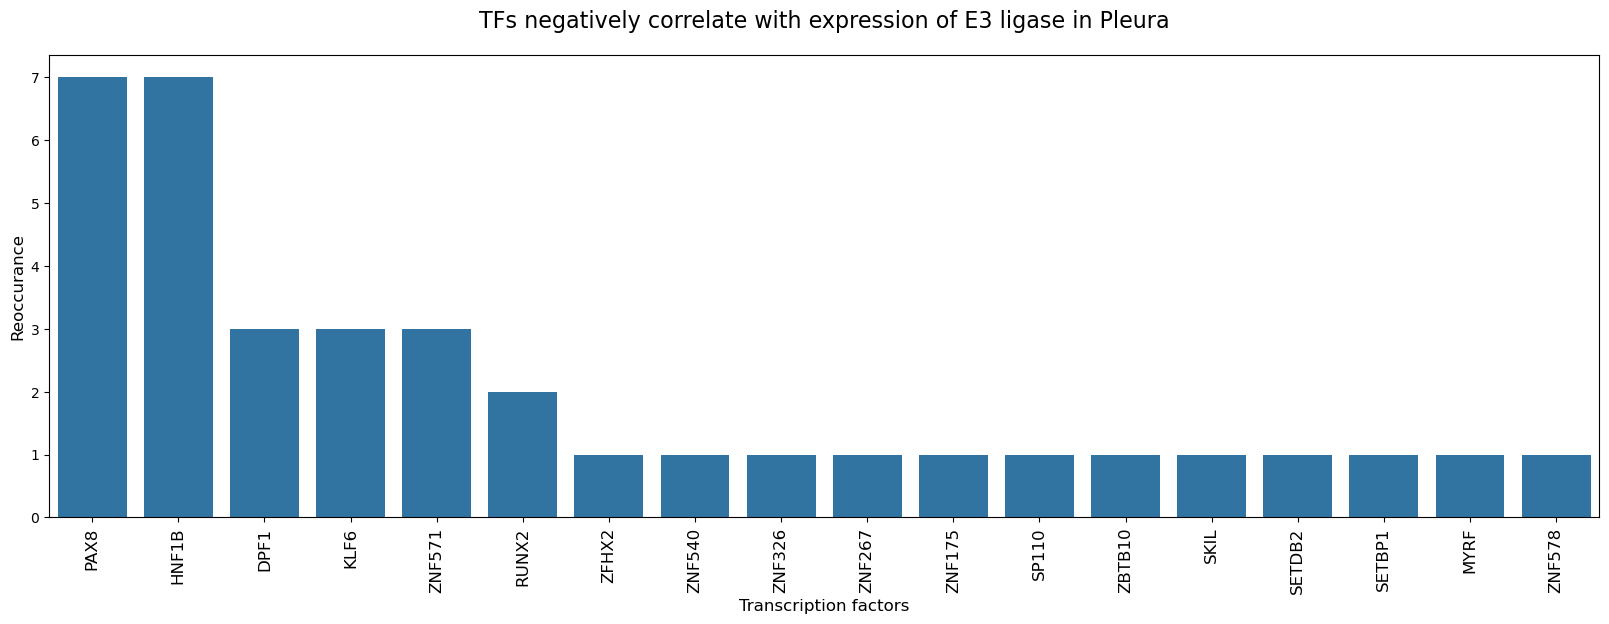

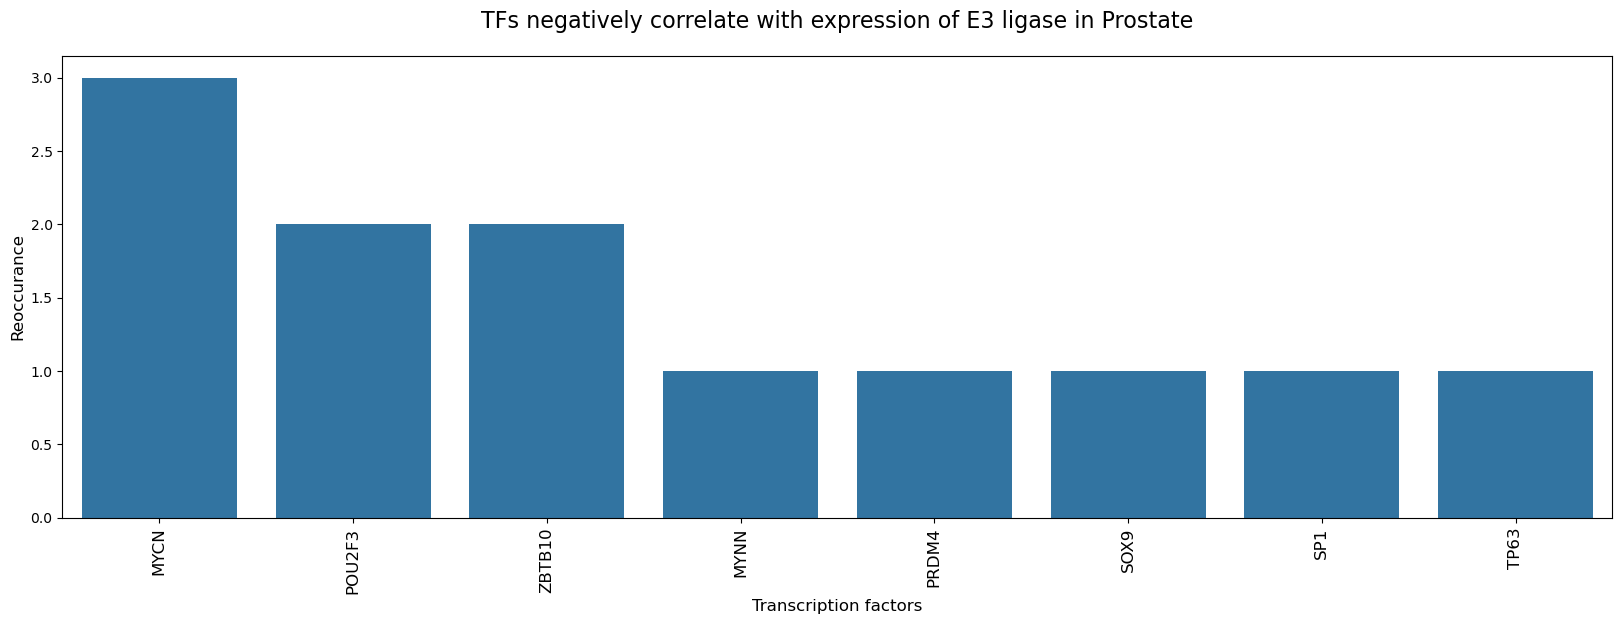

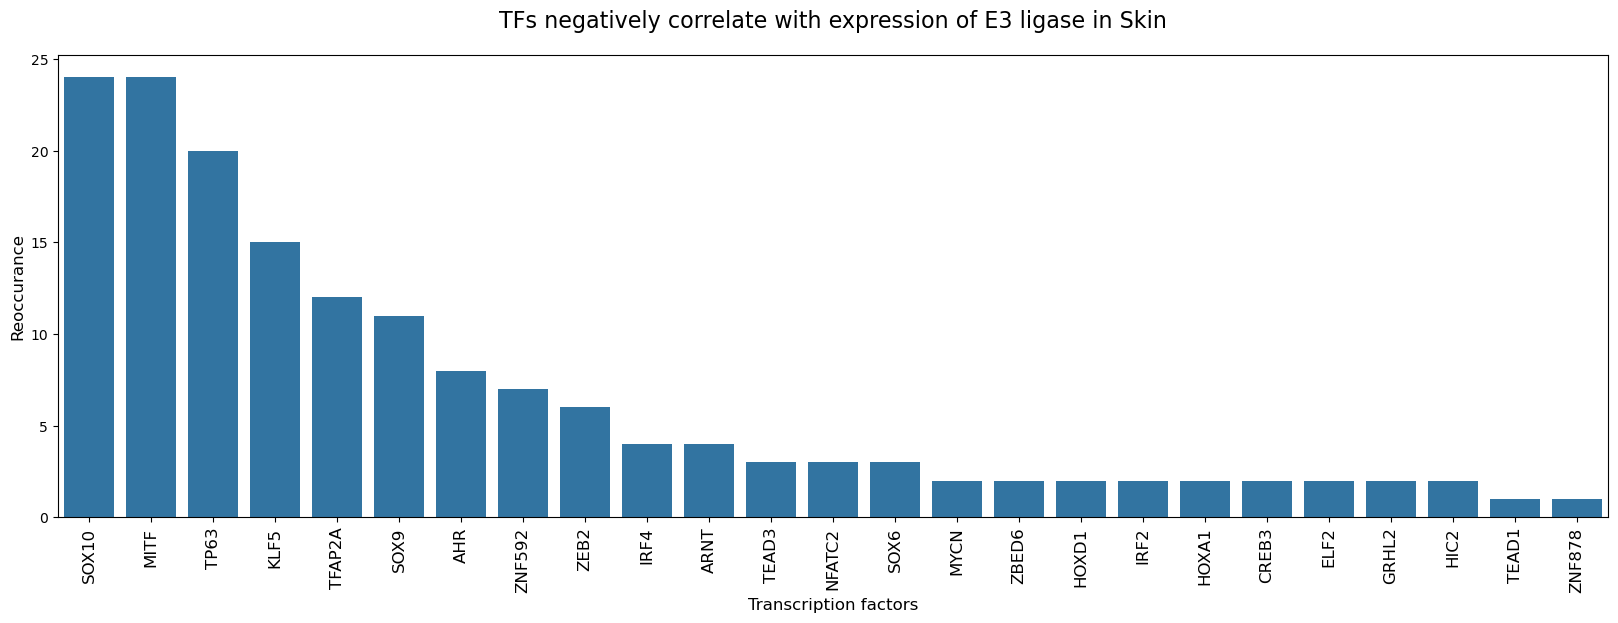

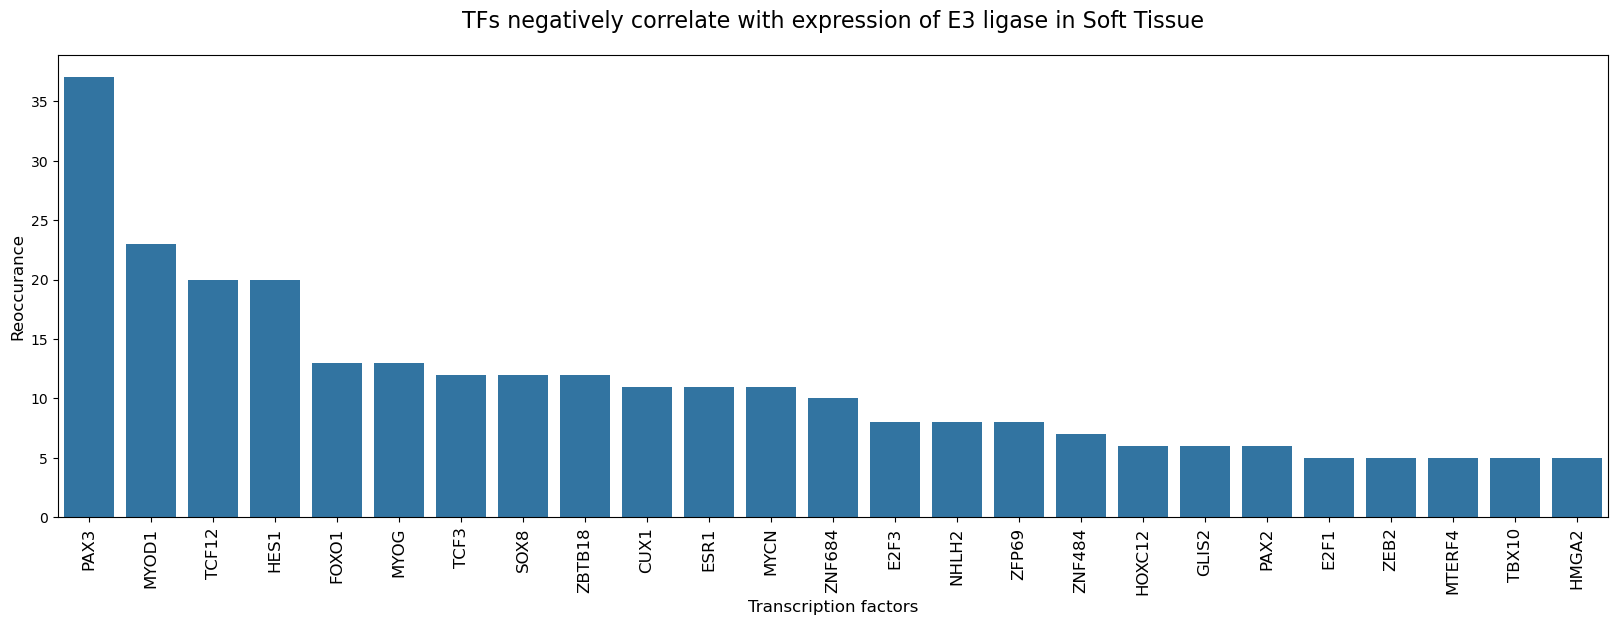

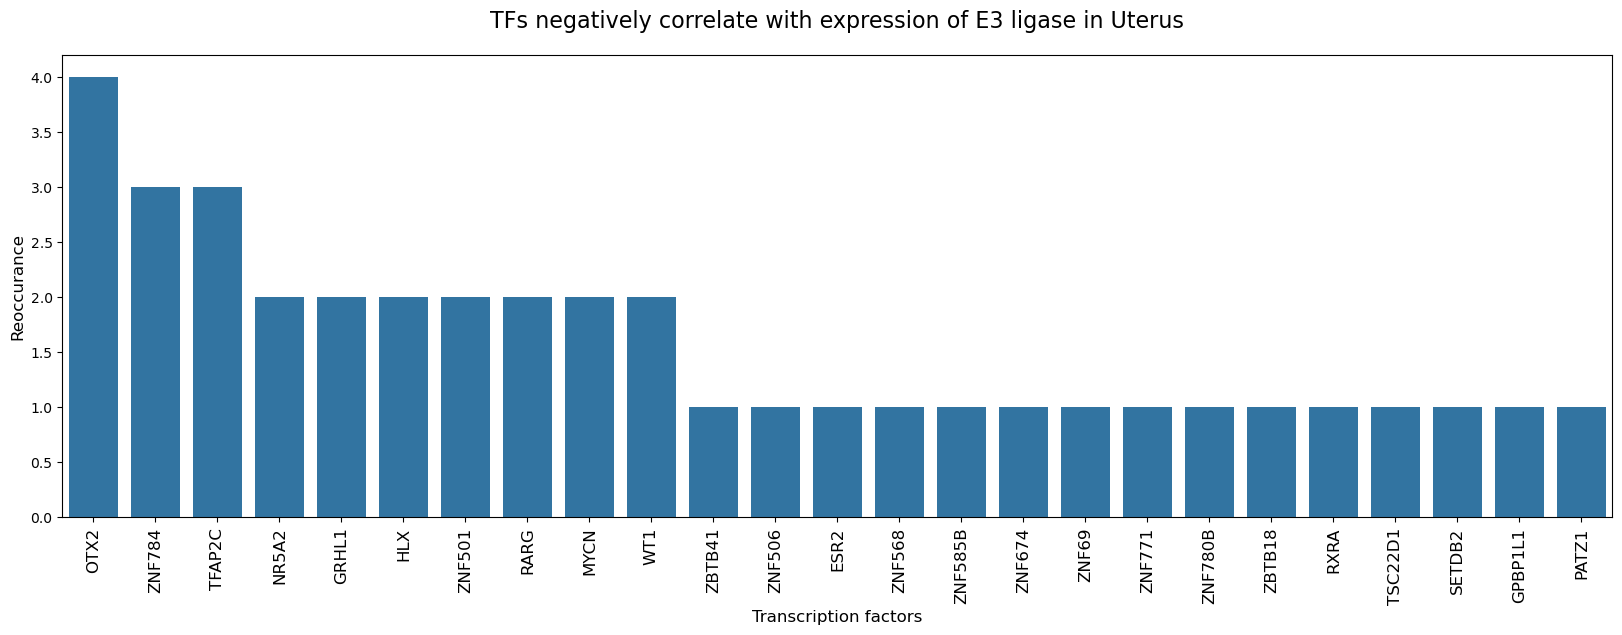

In [29]:
for lineage in tf_e3_corrs_fdrs_filtered['lineage'].unique(): 
    
    l_corr_f = tf_e3_corrs_fdrs_filtered.loc[tf_e3_corrs_fdrs_filtered['lineage'] == lineage,:]
    
    l_corr_f_count = l_corr_f.groupby('TF').nunique()
    
    l_corr_f_count_2 = pd.DataFrame(l_corr_f_count['corr'])
    
    l_corr_f_count_3=pd.DataFrame(l_corr_f_count_2.sort_values(by='corr',ascending=False)).reset_index()
    

    plt.figure(figsize = (20,6))
    
    sns.barplot(l_corr_f_count_3.head(25), x='TF', y= 'corr')

    plt.title(f'TFs negatively correlate with expression of E3 ligase in {lineage}', loc='center', fontsize=16, pad=20)
    plt.ylabel('Reoccurance', fontsize=12)
    plt.xlabel('Transcription factors', fontsize=12)
    #plt.gca().set_xticklabels([])
    plt.xticks(rotation = 90, fontsize = 12)
    plt.show()

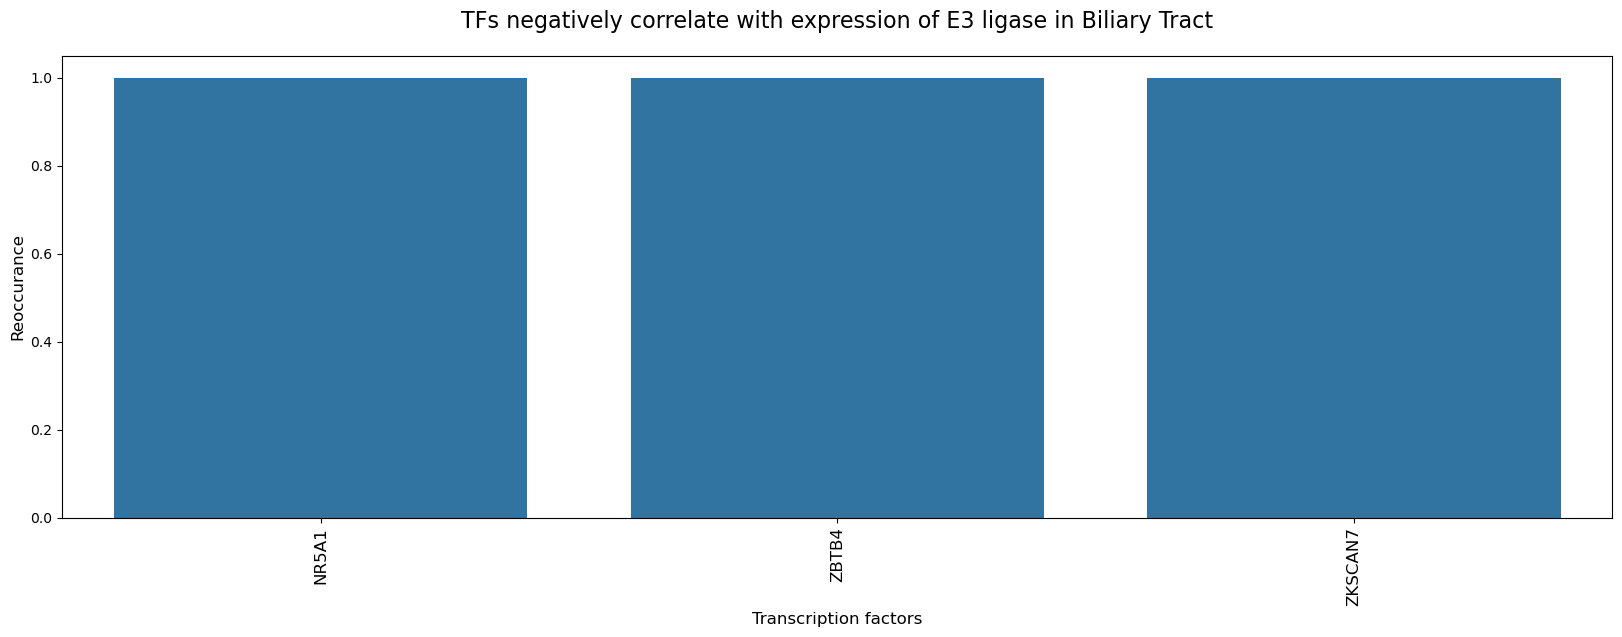

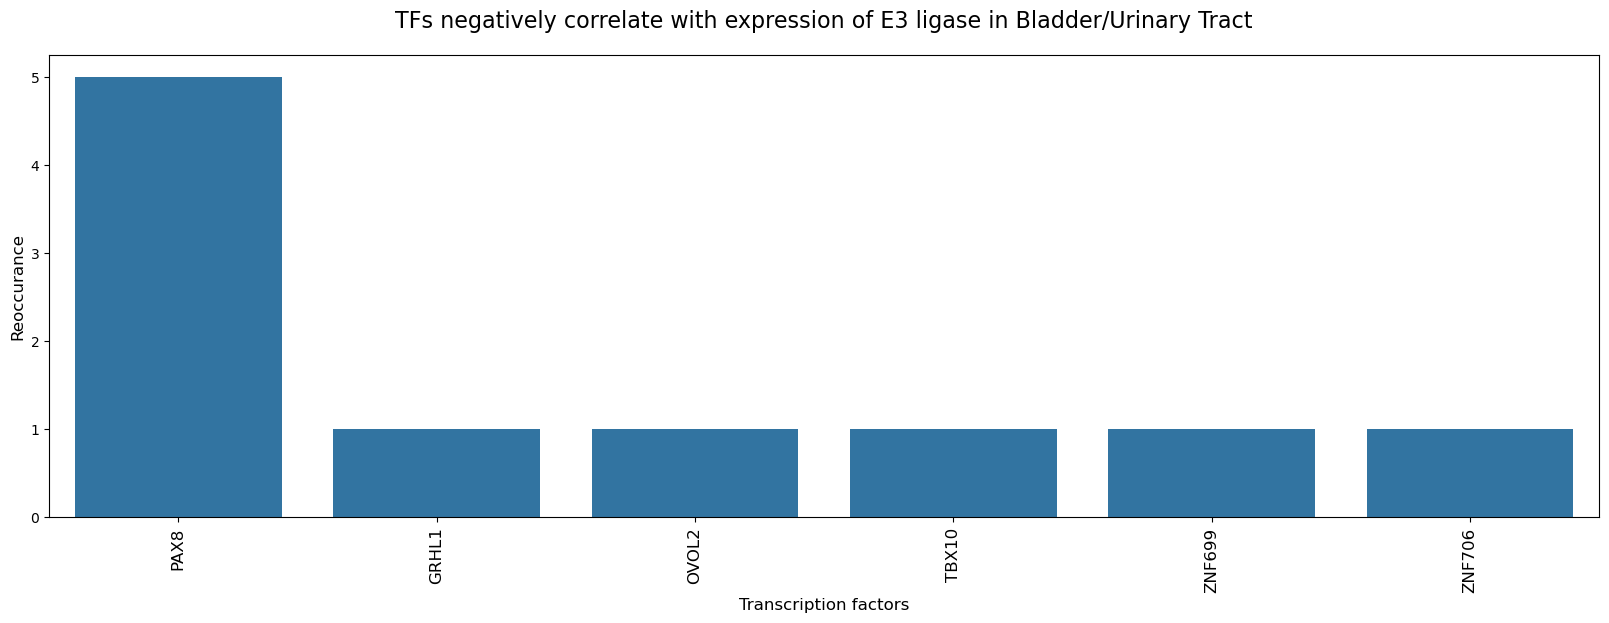

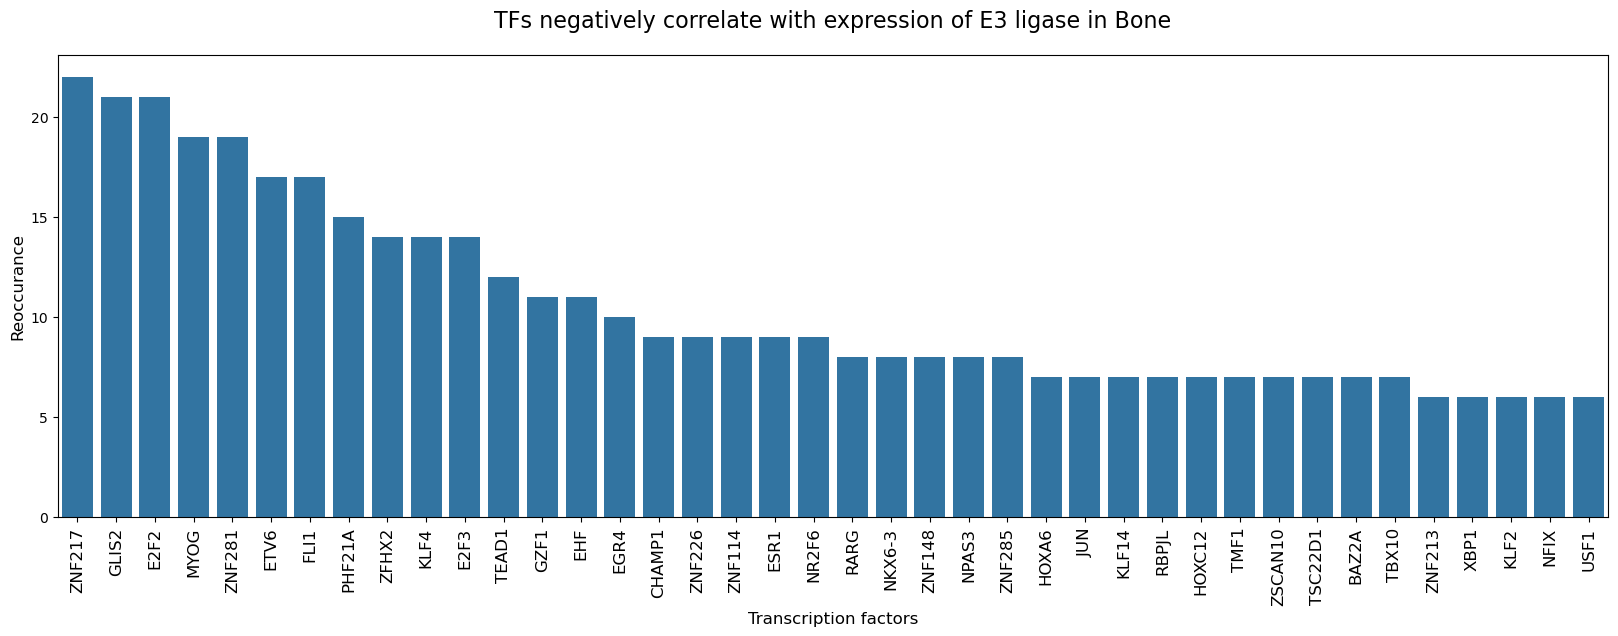

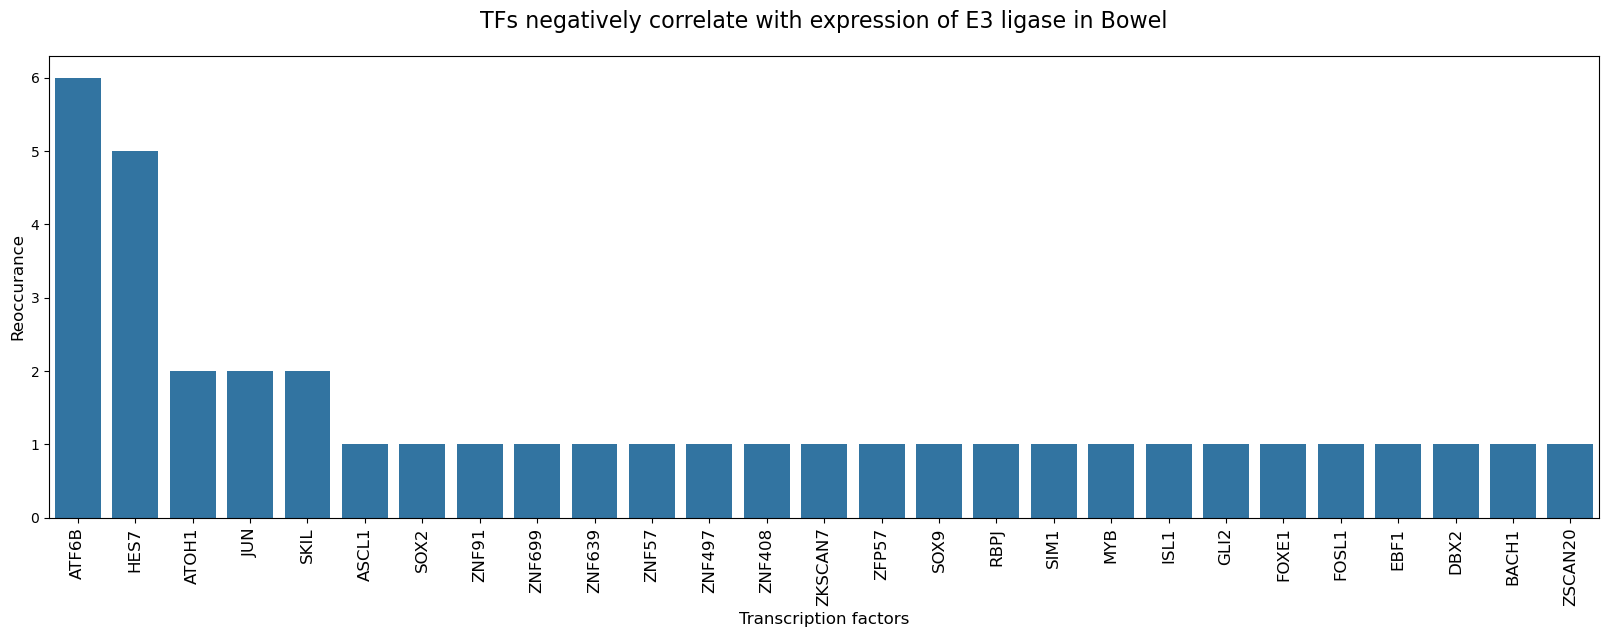

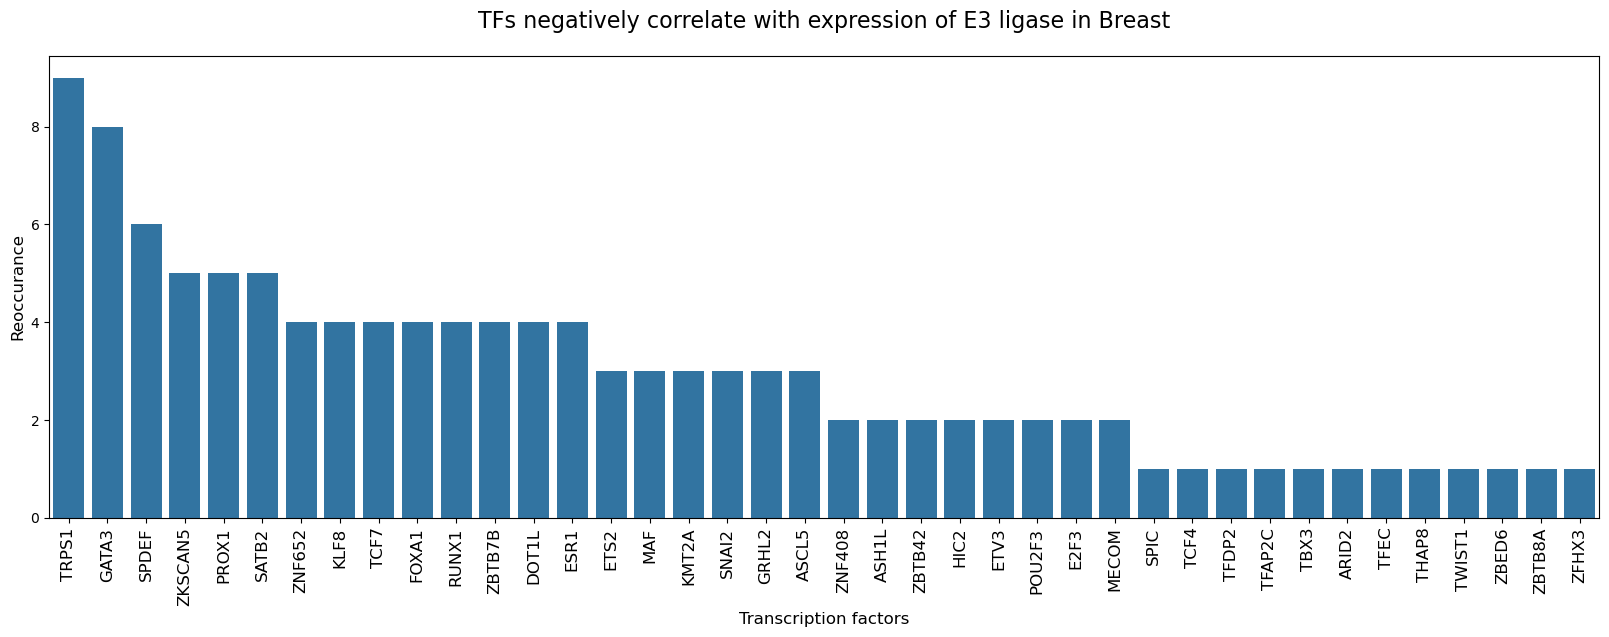

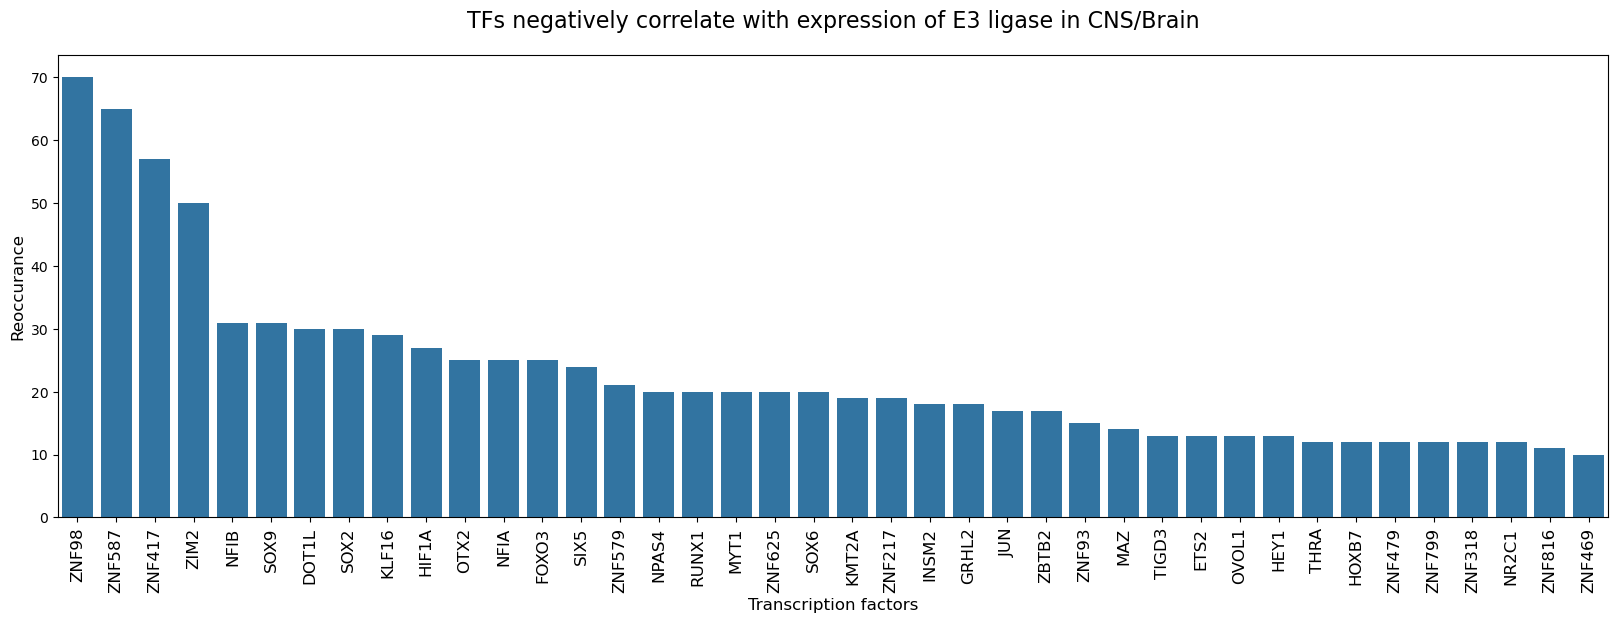

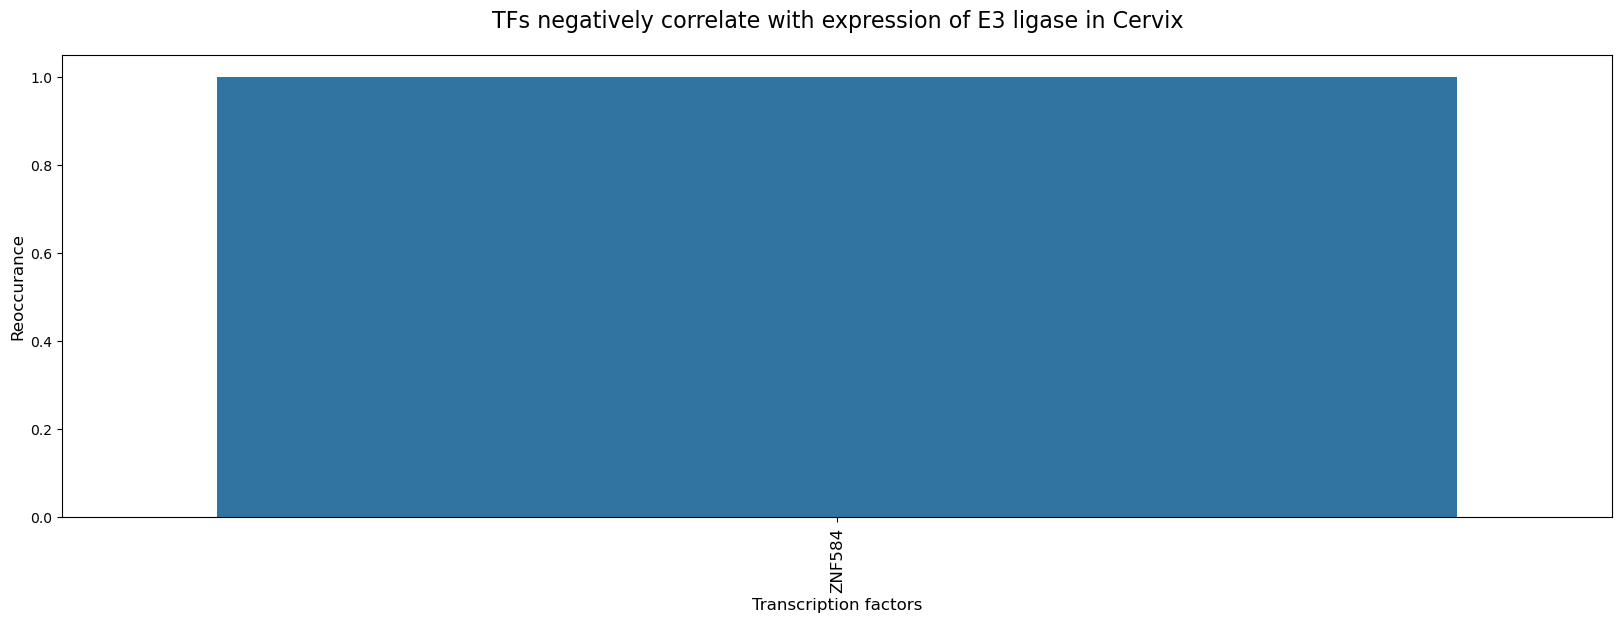

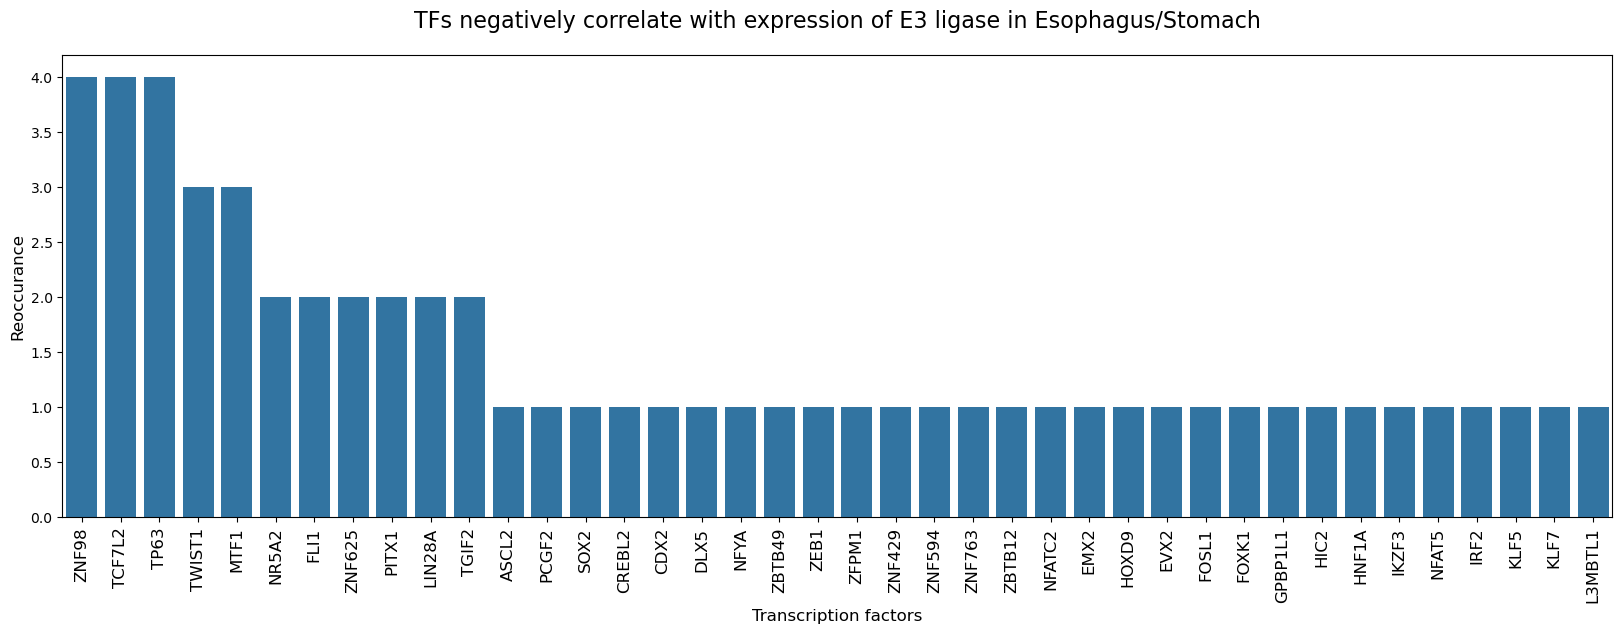

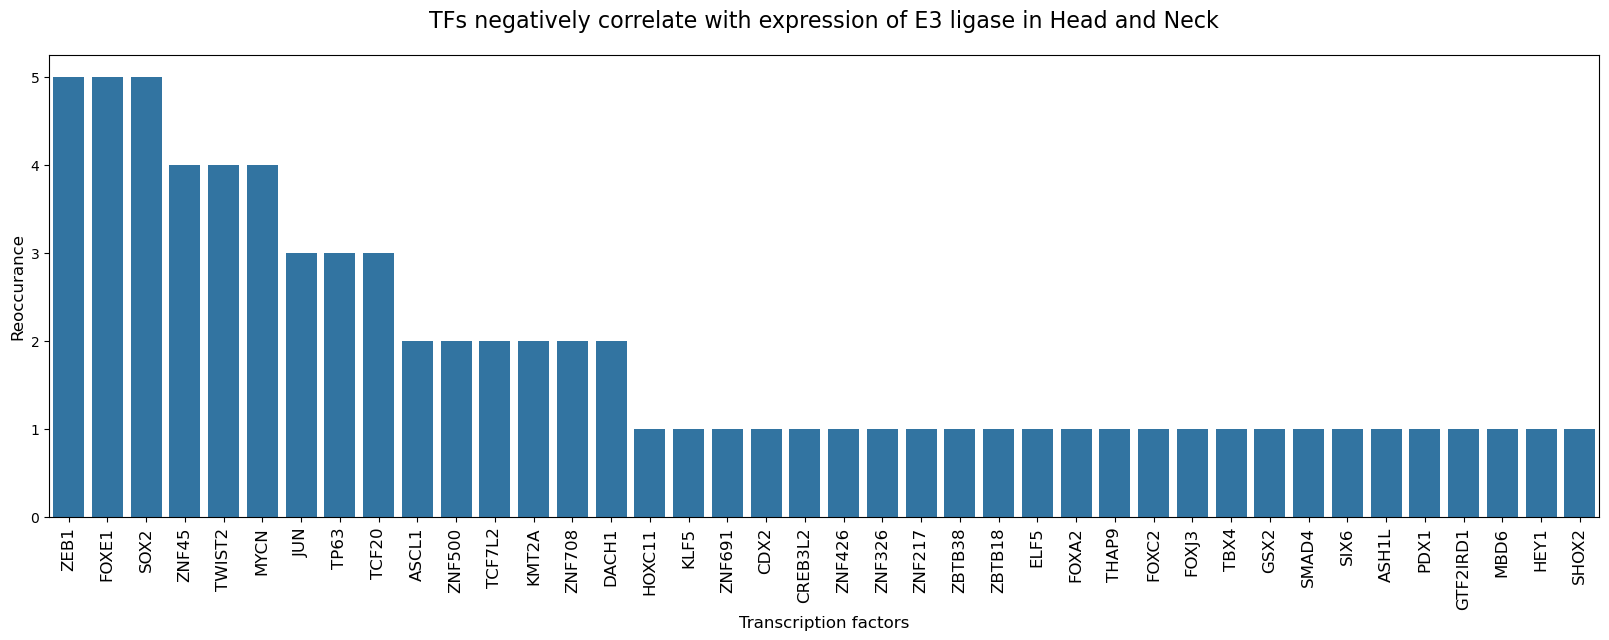

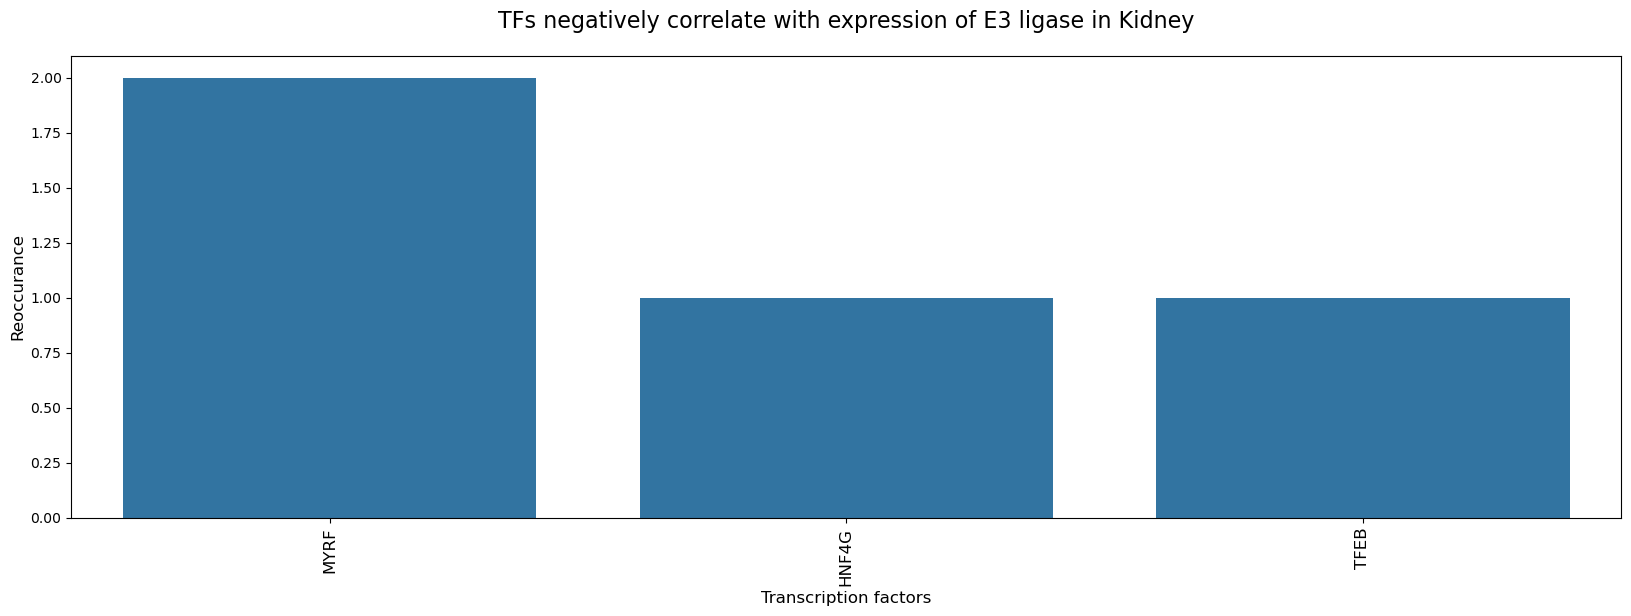

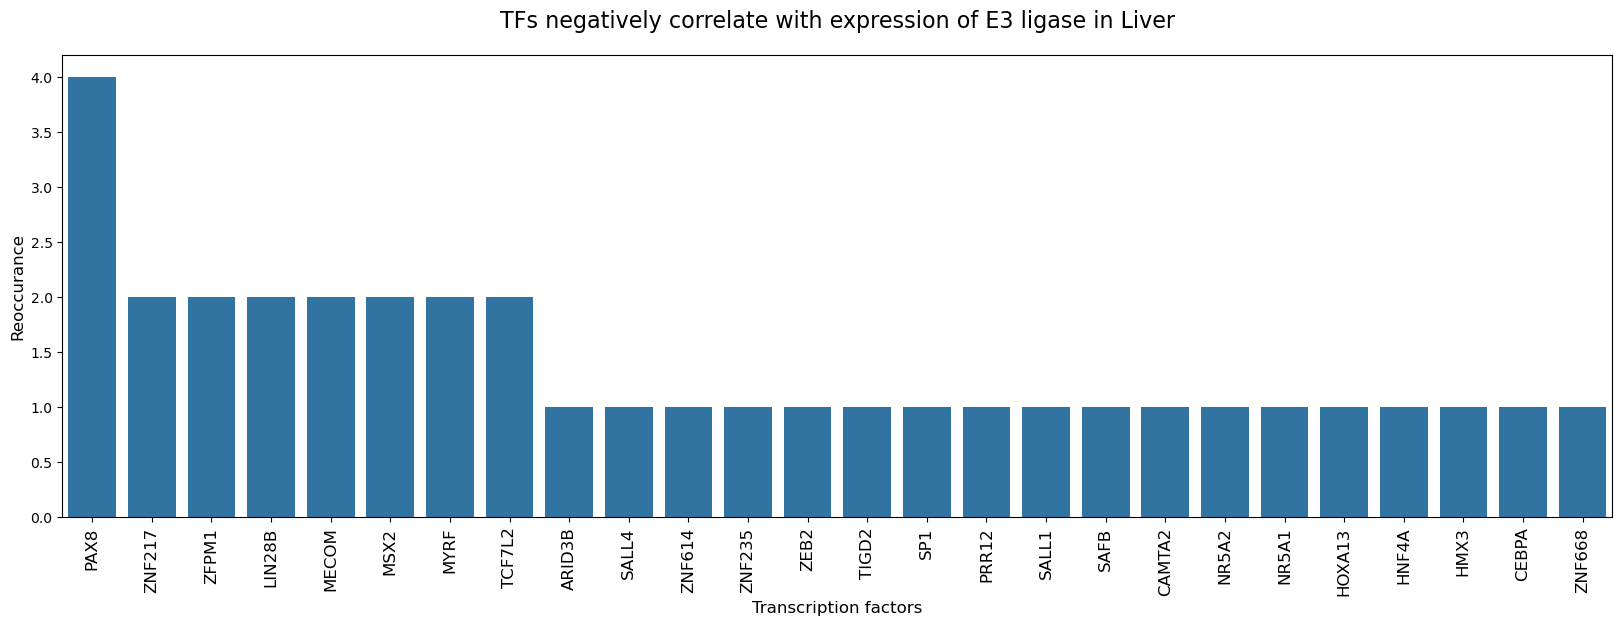

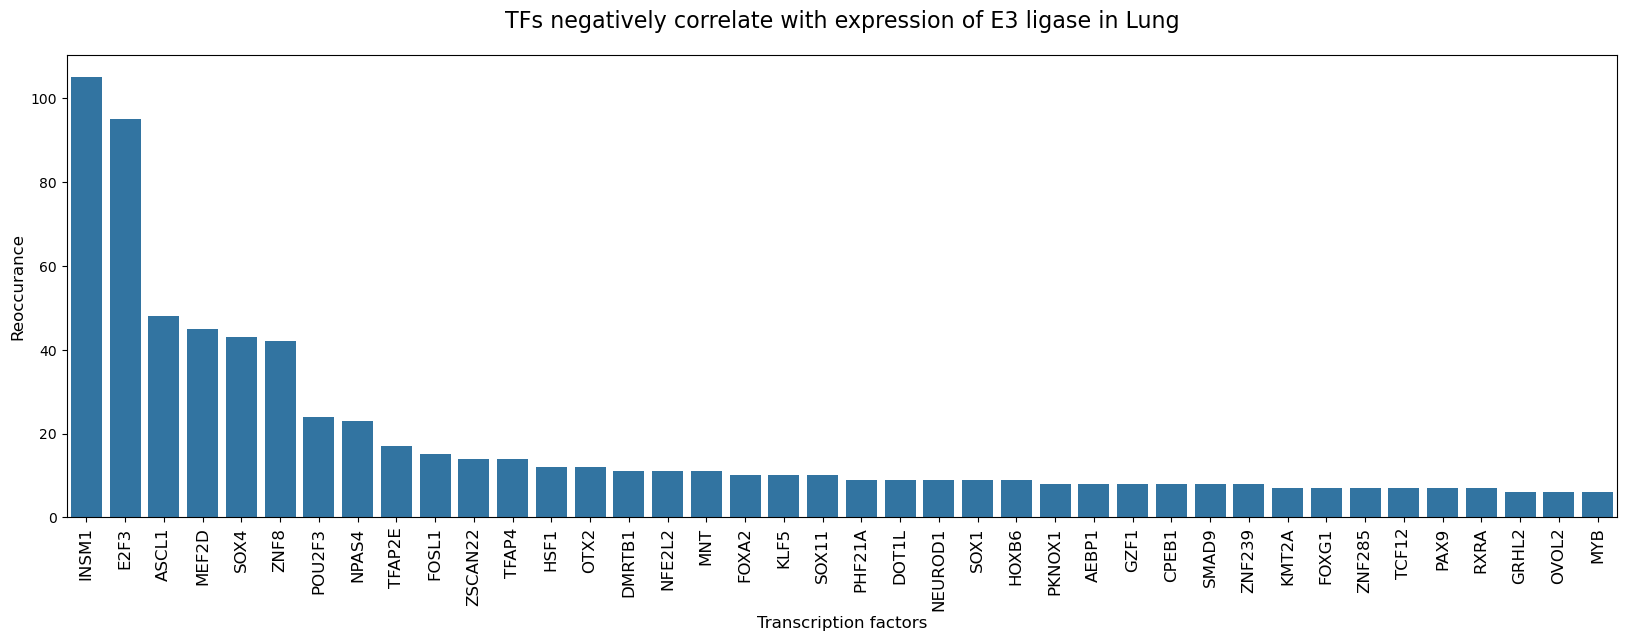

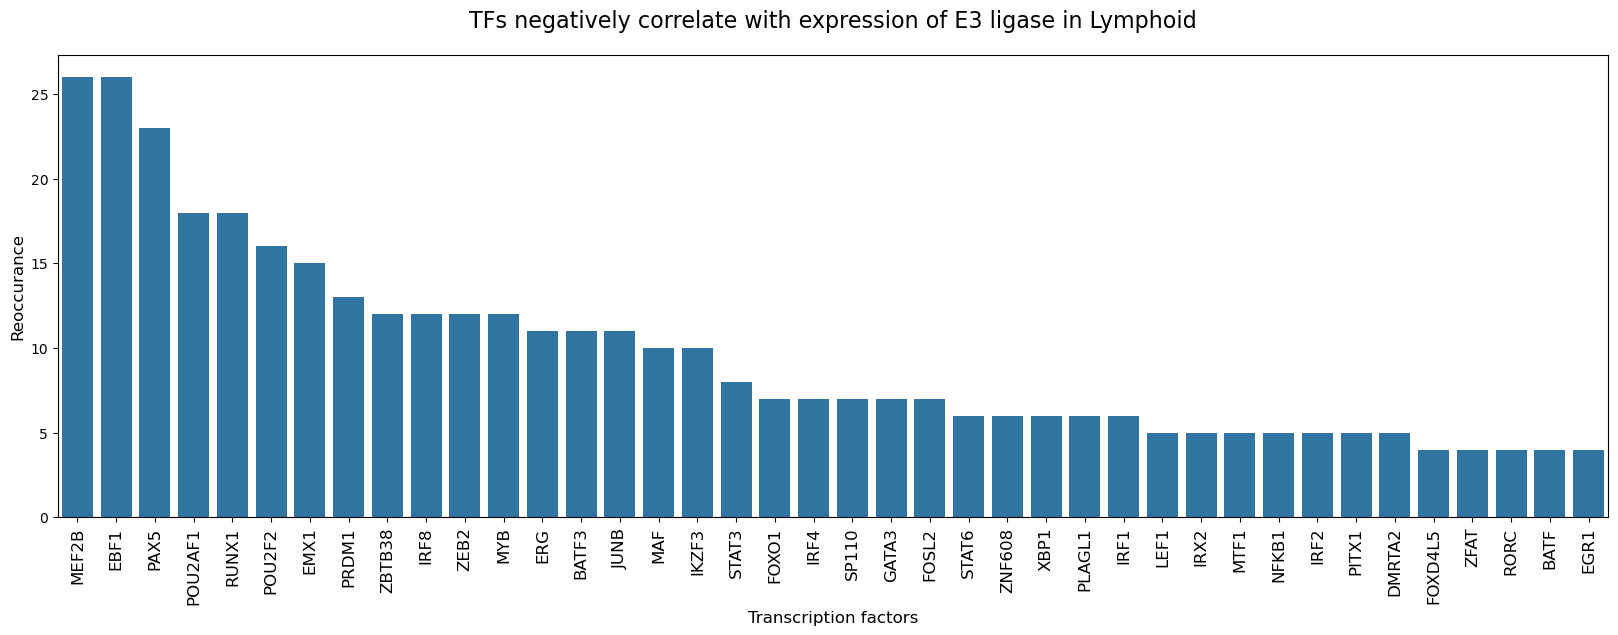

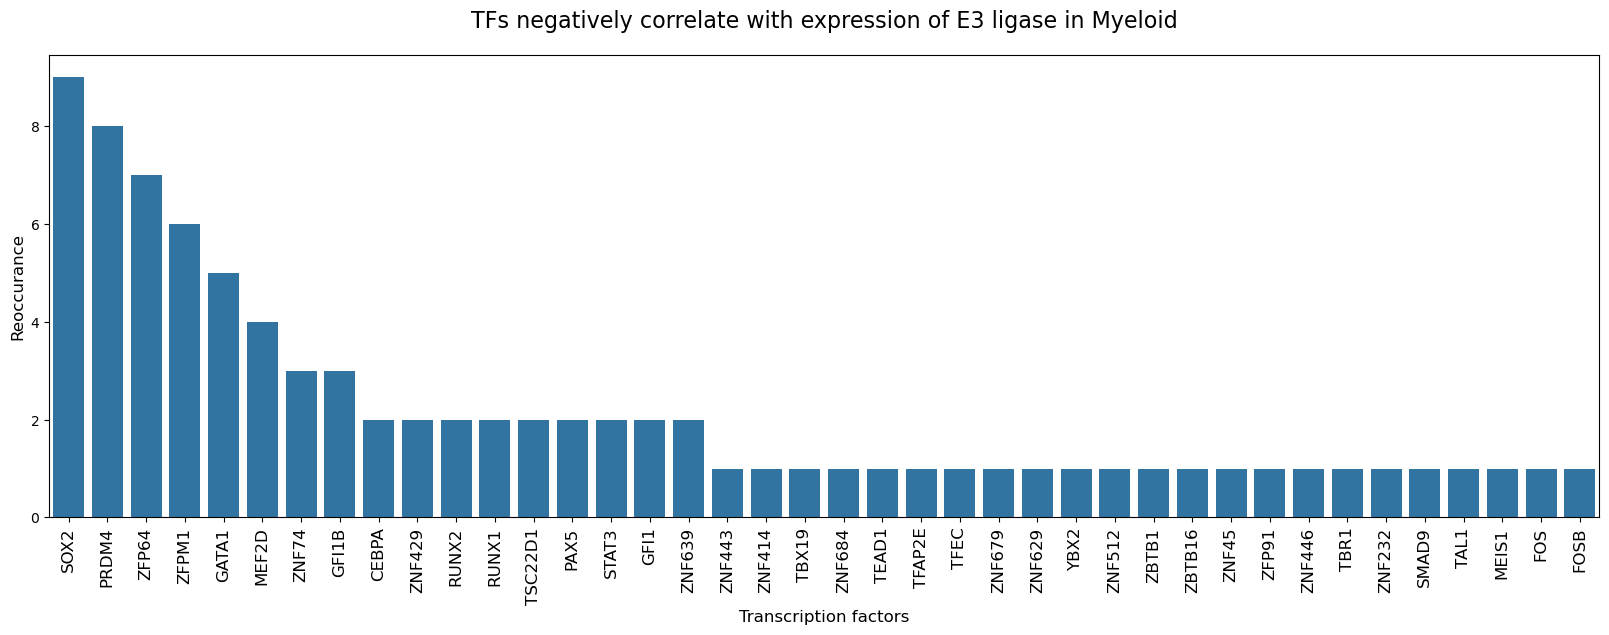

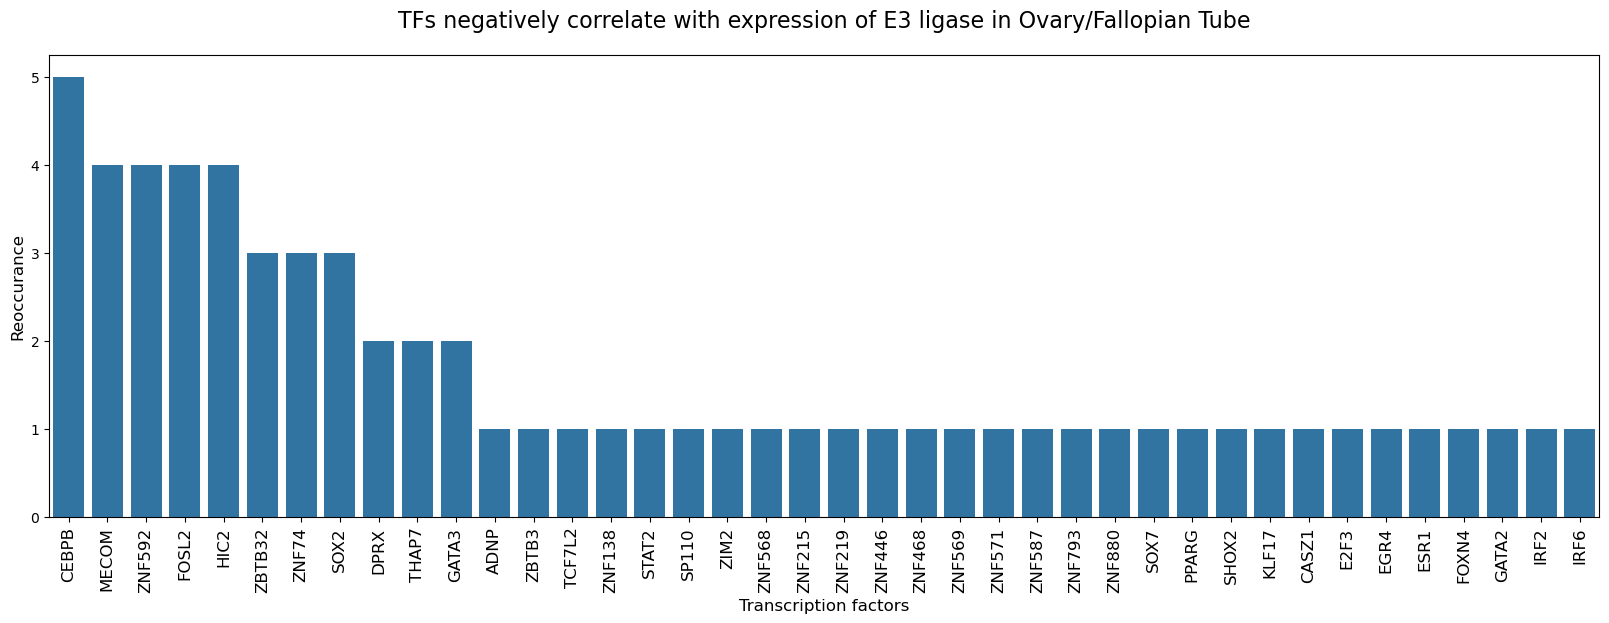

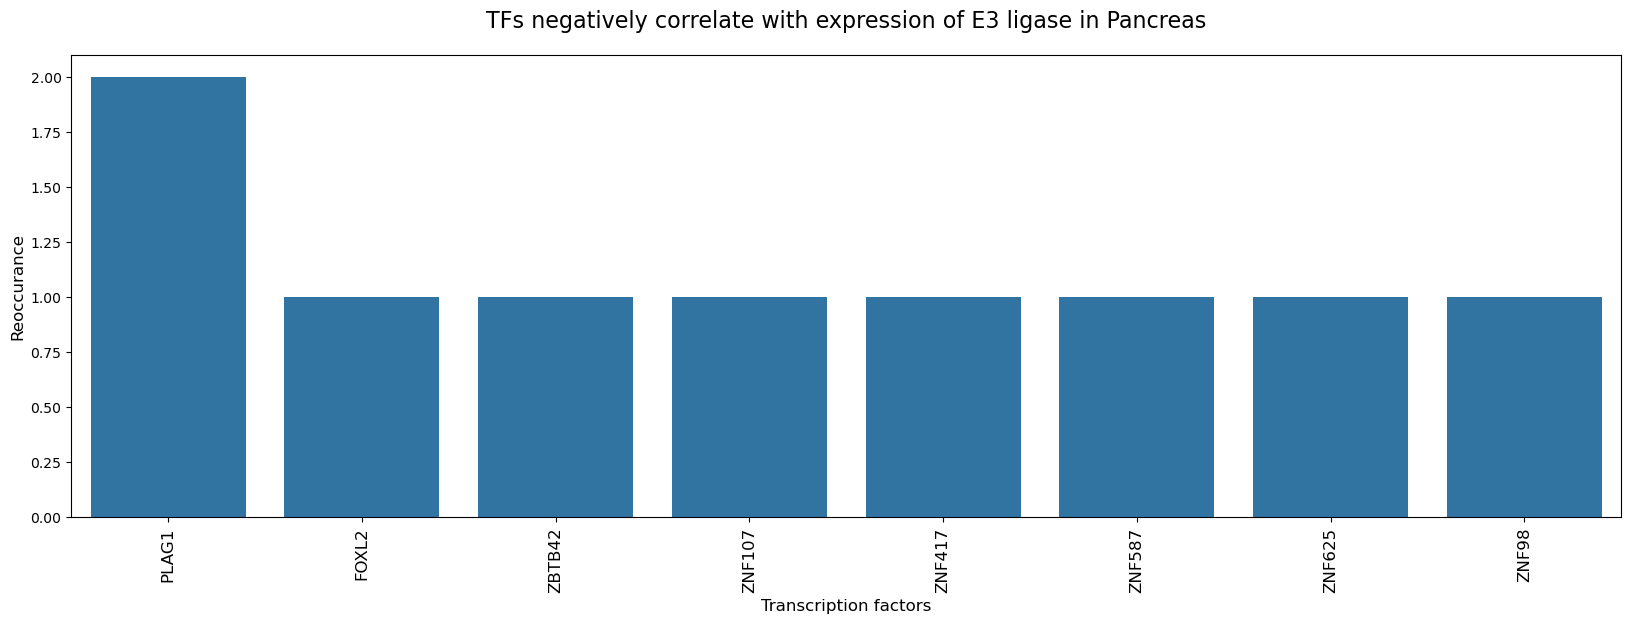

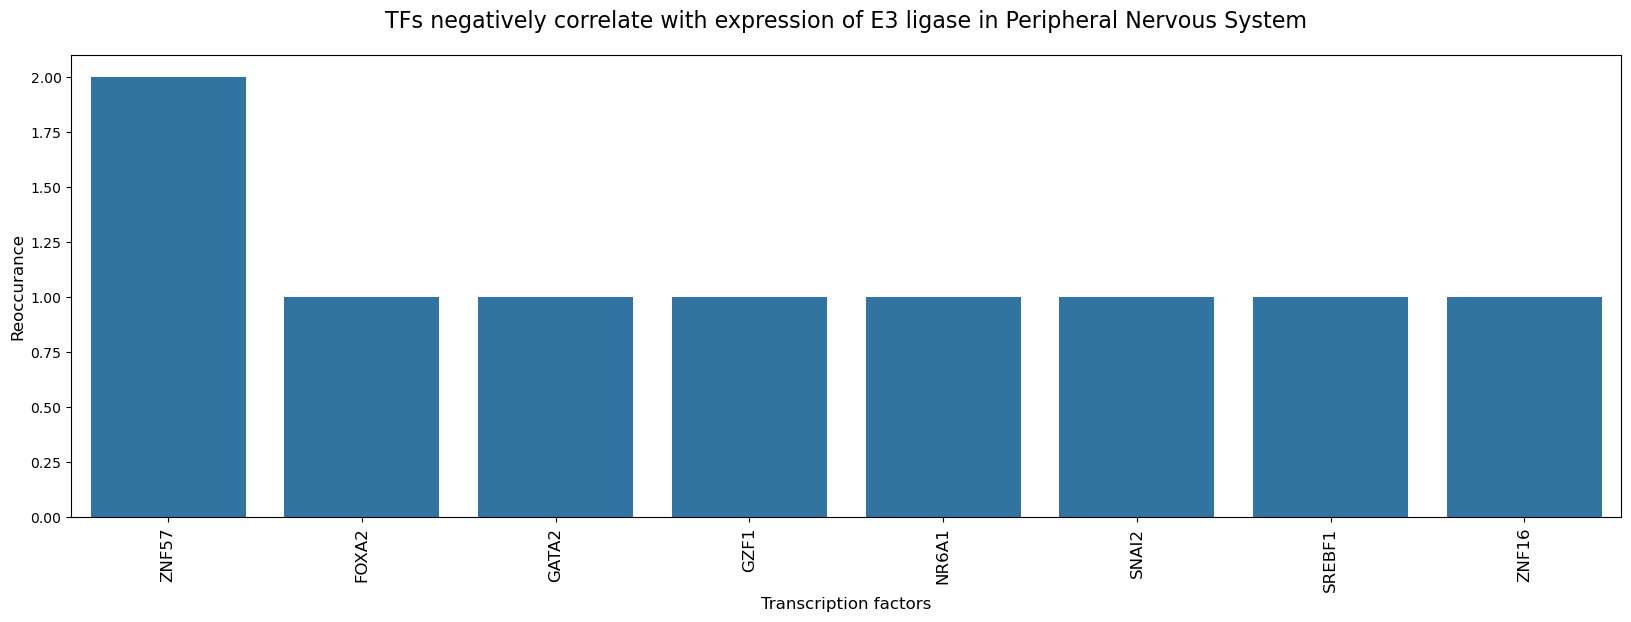

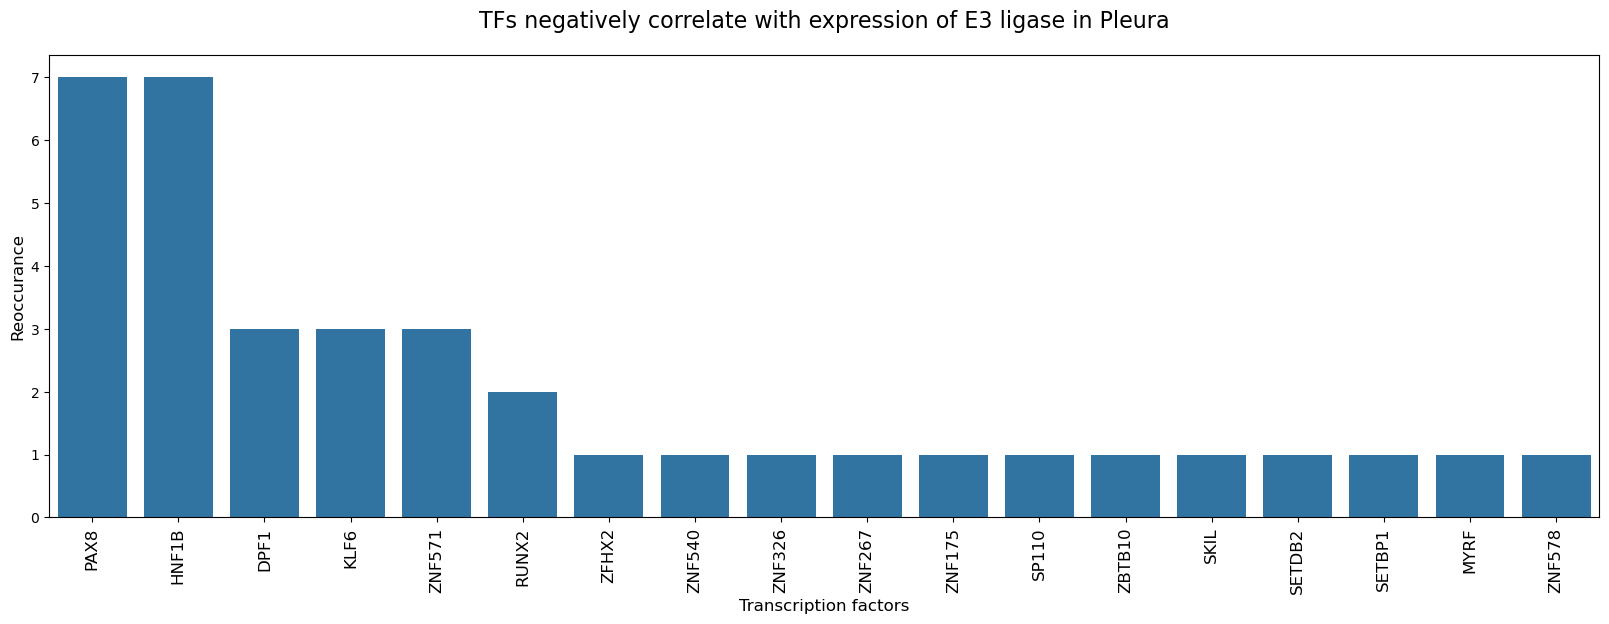

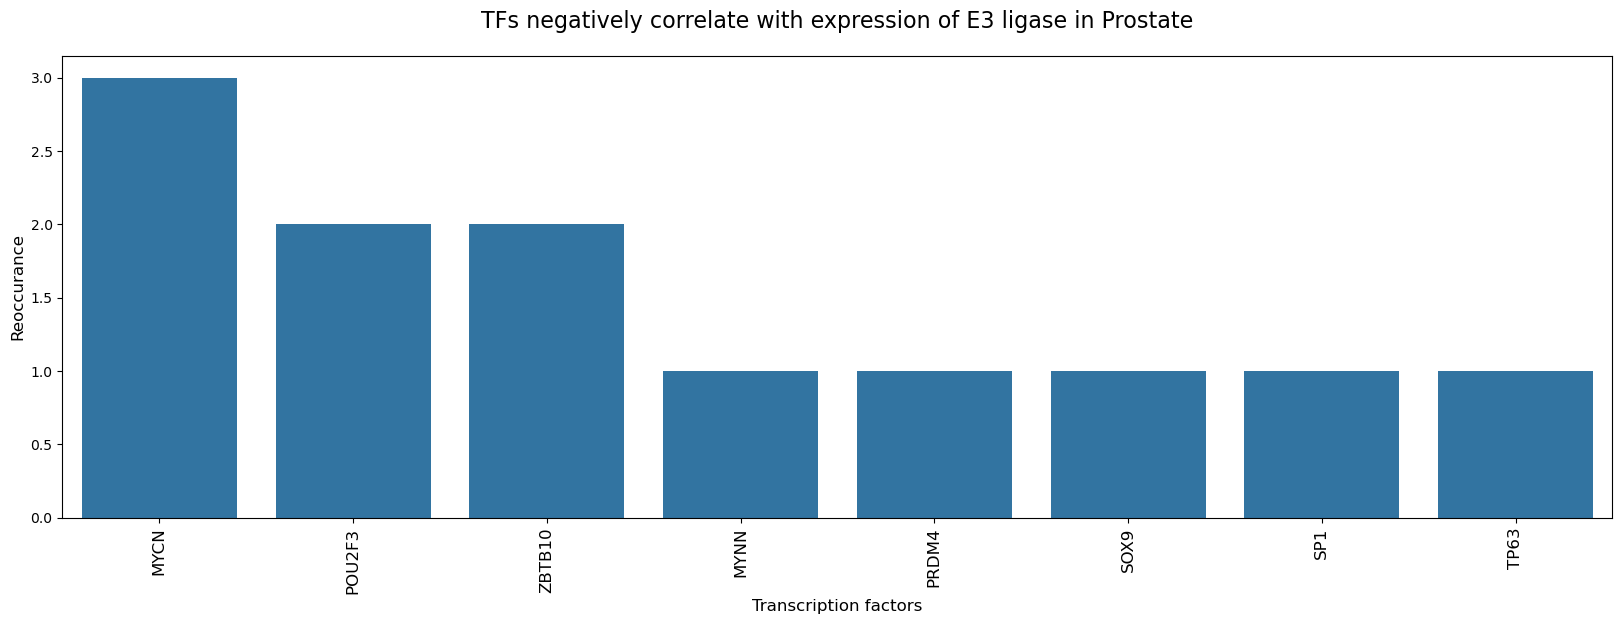

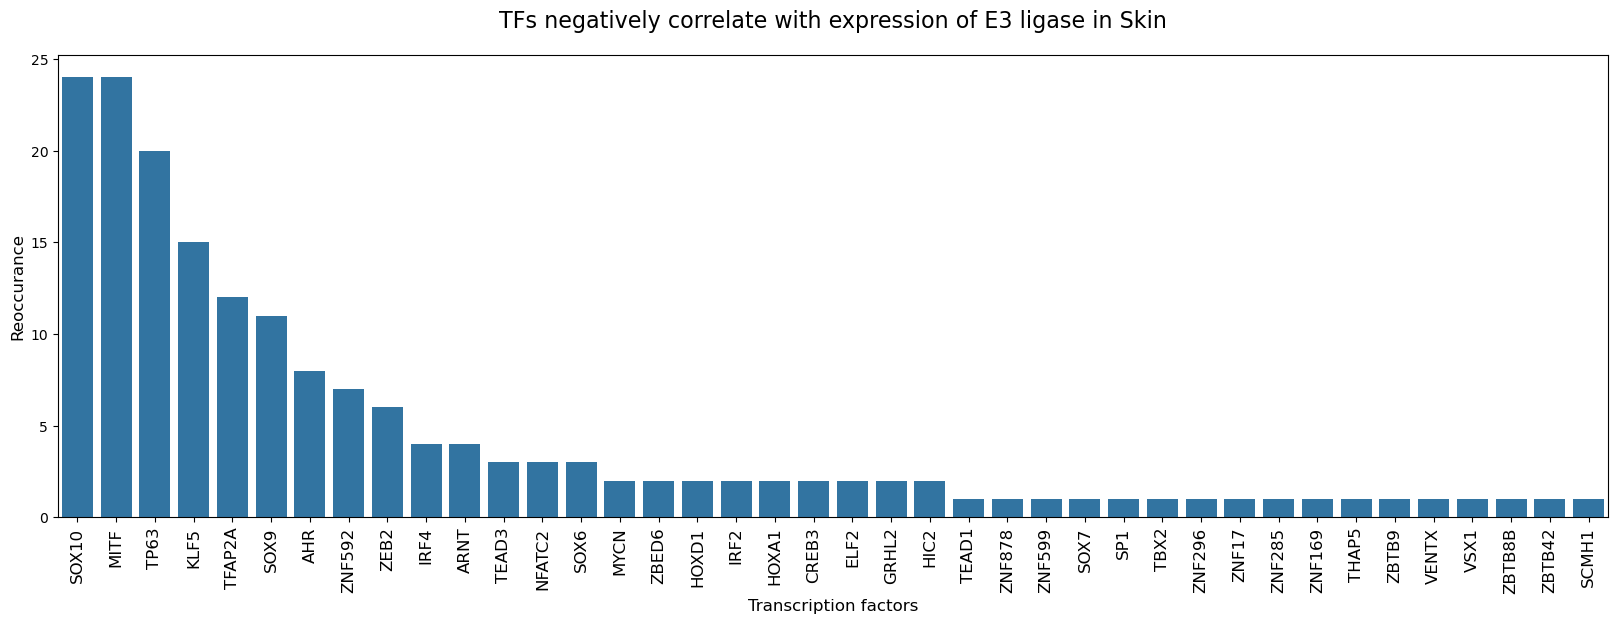

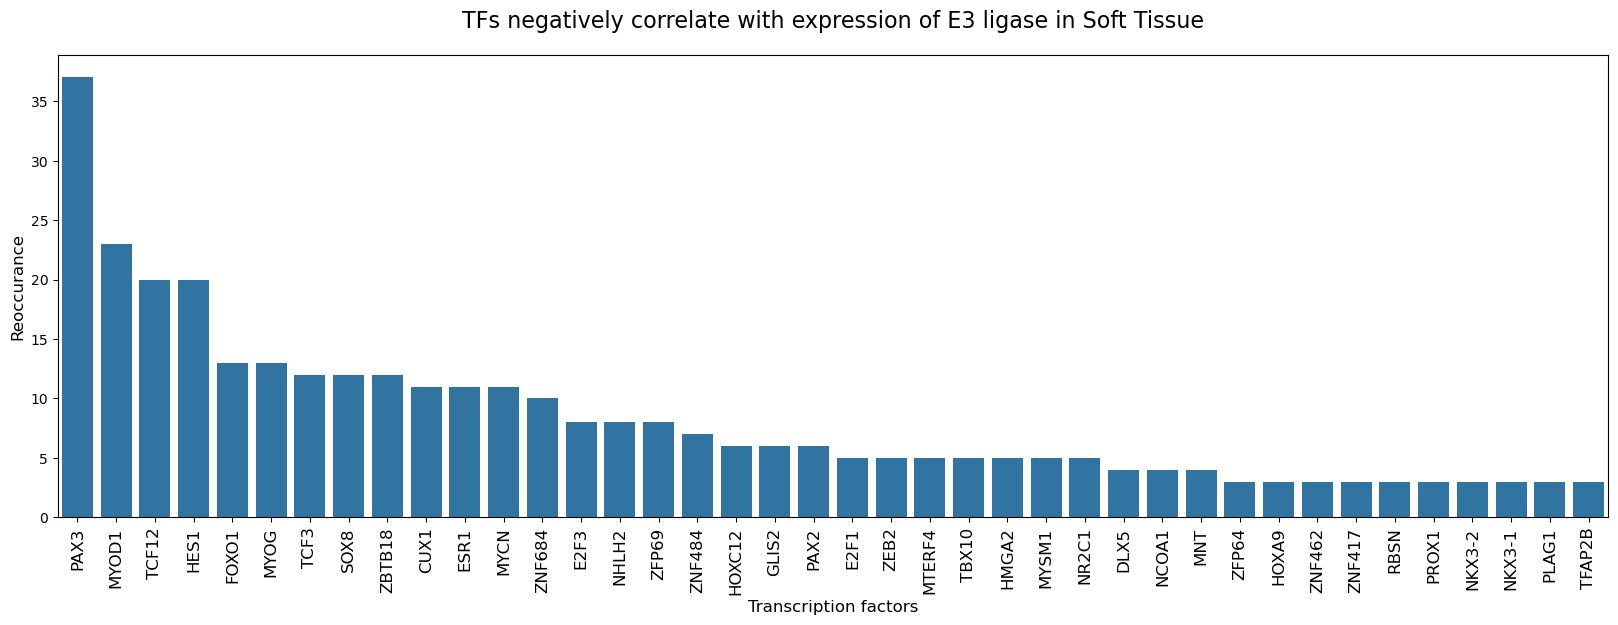

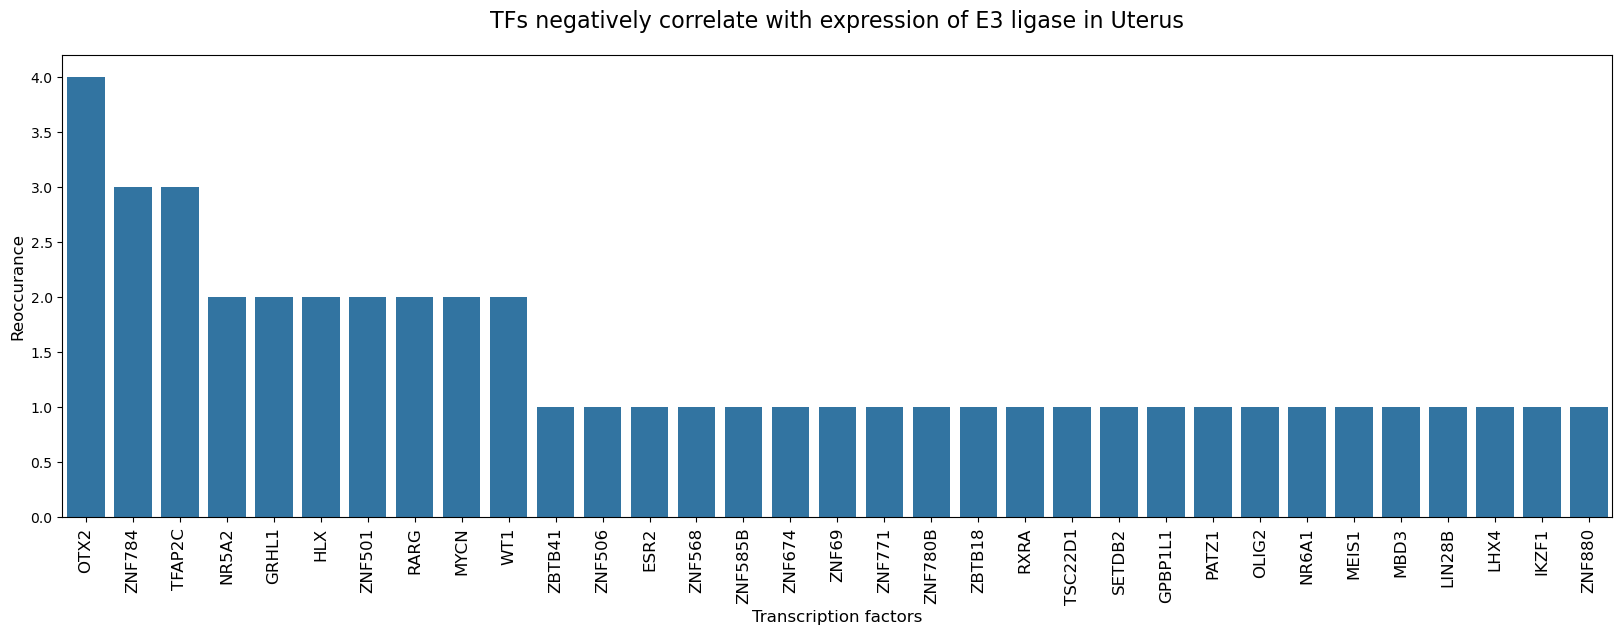

In [30]:
for lineage in tf_e3_corrs_fdrs_filtered['lineage'].unique(): 
    
    l_corr_f = tf_e3_corrs_fdrs_filtered.loc[tf_e3_corrs_fdrs_filtered['lineage'] == lineage,:]
    
    l_corr_f_count = l_corr_f.groupby('TF').nunique()
    
    l_corr_f_count_2 = pd.DataFrame(l_corr_f_count['corr'])
    
    l_corr_f_count_3=pd.DataFrame(l_corr_f_count_2.sort_values(by='corr',ascending=False)).reset_index()
    

    plt.figure(figsize = (20,6))
    
    sns.barplot(l_corr_f_count_3.head(40), x='TF', y= 'corr')

    plt.title(f'TFs negatively correlate with expression of E3 ligase in {lineage}', loc='center', fontsize=16, pad=20)
    plt.ylabel('Reoccurance', fontsize=12)
    plt.xlabel('Transcription factors', fontsize=12)
    #plt.gca().set_xticklabels([])
    plt.xticks(rotation = 90, fontsize = 12)
    plt.show()

In [ ]:
# TF_list = []
# TF_top_20_list = []

# for OncotreeLineage in correlation_df_all_p_c_filtered['OncotreeLineage'].unique(): 
    
#     l_corr_f = correlation_df_all_p_c_filtered.loc[correlation_df_all_p_c_filtered['OncotreeLineage'] == OncotreeLineage,:]
#     print(OncotreeLineage)
#     l_corr_f_count = l_corr_f.groupby('TF').nunique()
#     l_corr_f_count_2 = pd.DataFrame(l_corr_f_count['corr'])
#     l_corr_f_count_3=pd.DataFrame(l_corr_f_count_2.sort_values(by='corr',ascending=False)).reset_index()
#     l_corr_f_count_3['OncotreeLineage'] = OncotreeLineage


#     TF_list.append(l_corr_f_count_3)
#     TF_top_20_list.append(l_corr_f_count_3.head(20))

# TF_list = pd.concat(TF_list, ignore_index=True)
# TF_top_20_list = pd.concat(TF_top_20_list, ignore_index=True)

In [ ]:
# for OncotreeLineage in correlation_df_all_p_c_filtered['OncotreeLineage'].unique(): 
    
#     l_corr_f = correlation_df_all_p_c_filtered.loc[correlation_df_all_p_c_filtered['OncotreeLineage'] == OncotreeLineage,:]
    
#     l_corr_f_count = l_corr_f.groupby('TF').nunique()
#     # Set "15" as a threshold because we filtered out the lineages with less than 15 cell lines.
#     # Assume the TF occurs one time in a cell line by chance.
#     l_corr_f_count = l_corr_f_count[l_corr_f_count >= 16]
    
#     l_corr_f_count_2 = pd.DataFrame(l_corr_f_count['corr'])

#     sns.barplot(l_corr_f_count_2, x='TF', y= 'corr')

#     plt.title(f'TFs negatively correlate with expression of E3 ligase in {OncotreeLineage}', loc='center', fontsize=16, pad=20)
#     plt.ylabel('Counts', fontsize=12)
#     plt.xlabel('TF', fontsize=12)
#     plt.gca().set_xticklabels([])
#     #plt.xticks(rotation = 90 )
#     plt.show()